# Result Evaluation Model Performance

## Setup

In [1]:
# Step 2: Mount Google Drive (if using Google Drive for dataset/code)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl
!pip install deepsig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.9 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Organizing the data

In [4]:
dataset_name = 'rotten'
model_names = ['timemil']
root_path = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/experiments_{dataset_name}"

In [5]:
# # iterate through rootpath and retrieve contained subfolder names
# subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()]

# subfolders_names = [None] * len(subfolders)
# print(subfolders[0])
# for i in range(len(subfolders)):
#   subfolders_names[i] = subfolders[i].split('/')[-1]
#   print(subfolders_names[i])

In [6]:
# # create empty dataframe

# # iterate through subfolders
# rotten_df_metrics = pd.DataFrame()
# imdb_df_metrics = pd.DataFrame()
# twitter_df_metrics = pd.DataFrame()

# def find_csv_filenames(path_to_dir, suffix="test_metric_values.csv" ):
#     filenames = os.listdir(path_to_dir)
#     return [ filename for filename in filenames if filename.endswith( suffix ) ]

# for model in model_names:
#   for folder in subfolders:
#     subfolders_name = folder.split('/')[-1]
#     if dataset_name in subfolders_name and model in subfolders_name:
#       # check for file in subfolder that ends by "test_metric_values.csv"
#       filenames = find_csv_filenames(folder)
#       for filename in filenames:
#           metric_file_path = folder + '/' + filename
#           df_metrics = pd.read_csv(folder + '/' + filename)

#           if 'rotten' in subfolders_name:
#             rotten_df_metrics = pd.concat([rotten_df_metrics, df_metrics], ignore_index=True)


#### Extracting IntegratedGradients

In [7]:
# adjusted for IG and Interpretability
import os
import pandas as pd
import re

# Initialize empty DataFrames for each dataset
dataset_metrics_ig = {
    'rotten': pd.DataFrame(),
    'imdb': pd.DataFrame(),
    'twitter': pd.DataFrame()
}

# Helper function to find CSV filenames with a specific suffix
def find_csv_filenames(path_to_dir, suffix="IntegratedGradient_metrics_table.parquet"):
    filenames = os.listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]


# Base directory where all experiment subfolders are located
base_dir = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new"  # Replace with your experiments folder path
model_names = ["timemil", "todynet", "lstm_classifier"]  # Add your model names here
dataset_names = dataset_metrics_ig.keys()  # ['rotten', 'imdb', 'twitter']

# Iterate through dataset-specific experiment directories
for dataset_name in dataset_names:
    dataset_dir = os.path.join(base_dir, f"experiments_{dataset_name}_interpretations")
    if not os.path.exists(dataset_dir):
        print(f"Directory {dataset_dir} does not exist.")
        continue

    # Iterate through all subfolders in the dataset directory
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder, "metrics")

        # Ensure it's a directory and matches a model name and dataset name
        if os.path.isdir(folder_path) and any(model in folder for model in model_names) and dataset_name in folder:
            # Check for CSV files in the folder
            csv_files = find_csv_filenames(folder_path)
            for filename in csv_files:
                parquet_path = os.path.join(folder_path, filename)
                df_metrics = pd.read_parquet(parquet_path)

                # Add metadata columns for model, dataset, and run
                model_name = [model for model in model_names if model in folder][0]  # Extract model name
                match = re.search(r'run_(\d+)', folder)
                if match:
                  run_index = int(match.group(1))
                else:
                  run_index = None
                #run_index = int(filename.split('_')[1])  # Extract run index from the filename
                df_metrics['model'] = model_name
                df_metrics['dataset'] = dataset_name
                df_metrics['run'] = run_index

                # Append metrics to the corresponding dataset DataFrame
                dataset_metrics_ig[dataset_name] = pd.concat([dataset_metrics_ig[dataset_name], df_metrics], ignore_index=True)



#### Extracting DeepLift and fixing it

In [8]:
# adjusted for IG and Interpretability
import os
import pandas as pd

# Initialize empty DataFrames for each dataset
dataset_metrics_dl = {
    'rotten': pd.DataFrame(),
    'imdb': pd.DataFrame(),
    'twitter': pd.DataFrame()
}

# Helper function to find CSV filenames with a specific suffix
def find_csv_filenames(path_to_dir, suffix="DeepLift_metrics_table.parquet"):
    filenames = os.listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]


# Base directory where all experiment subfolders are located
base_dir = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new"  # Replace with your experiments folder path
model_names = ["timemil", "todynet", "lstm_classifier"]  # Add your model names here
dataset_names = dataset_metrics_dl.keys()  # ['rotten', 'imdb', 'twitter']

# Iterate through dataset-specific experiment directories
for dataset_name in dataset_names:
    dataset_dir = os.path.join(base_dir, f"experiments_{dataset_name}_interpretations")
    if not os.path.exists(dataset_dir):
        print(f"Directory {dataset_dir} does not exist.")
        continue

    # Iterate through all subfolders in the dataset directory
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder, "metrics")

        # Ensure it's a directory and matches a model name and dataset name
        if os.path.isdir(folder_path) and any(model in folder for model in model_names) and dataset_name in folder:
            # Check for CSV files in the folder
            csv_files = find_csv_filenames(folder_path)
            for filename in csv_files:
                parquet_path = os.path.join(folder_path, filename)
                df_metrics = pd.read_parquet(parquet_path)

                # Add metadata columns for model, dataset, and run
                model_name = [model for model in model_names if model in folder][0]  # Extract model name
                match = re.search(r'run_(\d+)', folder)
                if match:
                  run_index = int(match.group(1))
                else:
                  run_index = None
                #run_index = int(filename.split('_')[1])  # Extract run index from the filename
                df_metrics['model'] = model_name
                df_metrics['dataset'] = dataset_name
                df_metrics['run'] = run_index

                # Append metrics to the corresponding dataset DataFrame
                dataset_metrics_dl[dataset_name] = pd.concat([dataset_metrics_dl[dataset_name], df_metrics], ignore_index=True)



Fixing deeplift column name.

In [9]:
print(dataset_metrics_dl["rotten"].columns)

dataset_metrics_dl_new = {}
for dataset_name, df in dataset_metrics_dl.items():
  # change column name in df for col avg_entropy_ig to avg_entropy_dl
  df.rename(columns={'avg_entropy_ig': 'avg_entropy_dl'}, inplace=True)
  # create updated dataset_metrics_dl
  dataset_metrics_dl_new[dataset_name] = df

print(dataset_metrics_dl_new["rotten"].columns)


Index(['model_name', 'avg_entropy_ig', 'avg_infidelity', 'std_infidelity',
       'method', 'model', 'dataset', 'run'],
      dtype='object')
Index(['model_name', 'avg_entropy_dl', 'avg_infidelity', 'std_infidelity',
       'method', 'model', 'dataset', 'run'],
      dtype='object')


Merging the datasets together.

In [10]:
dataset_metrics = {}
# merging the dataset
for dataset_name, df in dataset_metrics_dl_new.items():
    dataset_metrics[dataset_name] = df.merge(dataset_metrics_ig[dataset_name], on=['model', 'dataset', 'run'], suffixes=('_dl', '_ig'))
    print(f"Merged {dataset_name} dataset.")
    dataset_metrics[dataset_name].drop(columns=['model_name_dl', 'model_name_ig'], inplace=True)

dataset_metrics['rotten']

Merged rotten dataset.
Merged imdb dataset.
Merged twitter dataset.


,avg_entropy_dl,avg_infidelity_dl,std_infidelity_dl,method_dl,model,dataset,run,avg_entropy_ig,avg_infidelity_ig,std_infidelity_ig,method_ig
0,2.330444,0.003287,0.001844,DeepLift,timemil,rotten,0,2.350918,0.002951,0.001833,IntegratedGradients
1,2.338147,0.004657,0.003941,DeepLift,timemil,rotten,1,2.348355,0.004569,0.003484,IntegratedGradients
2,2.335312,0.009093,0.008773,DeepLift,timemil,rotten,2,2.352097,0.007717,0.006729,IntegratedGradients
3,2.349065,0.001958,0.001350,DeepLift,timemil,rotten,3,2.341445,0.001669,0.001132,IntegratedGradients
4,2.331997,0.003288,0.002887,DeepLift,timemil,rotten,4,2.329902,0.003070,0.002763,IntegratedGradients
5,2.336888,0.003141,0.002316,DeepLift,timemil,rotten,5,2.337968,0.002579,0.001903,IntegratedGradients
6,2.323982,0.002093,0.001533,DeepLift,timemil,rotten,6,2.337093,0.001960,0.001510,IntegratedGradients
7,2.340066,0.006472,0.010125,DeepLift,timemil,rotten,7,2.350629,0.006287,0.011037,IntegratedGradients
8,2.347003,0.002444,0.001630,DeepLift,timemil,rotten,8,2.351845,0.001870,0.001195,IntegratedGradients
9,2.344607,0.003187,0.002633,DeepLift,timemil,rotten,9,2.347688,0.002841,0.001842,IntegratedGradients


In [11]:
base_dir = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new"
results_folder = "results"
results_path = os.path.join(base_dir, results_folder)
os.makedirs(results_path, exist_ok=True)

# Iterate through dataset-specific experiment directories
# Save each dataset's metrics to CSV for inspection
for dataset_name, df in dataset_metrics.items():
    output_file = f"{dataset_name}_aggregated_interpretability_metrics.parquet"
    output_path = os.path.join(results_path, output_file)
    df.to_parquet(output_path, index=False)
    print(f"Aggregated metrics for {dataset_name} saved to {output_path}.")

# save each dataset to excel file using pandas
for dataset_name, df in dataset_metrics.items():
    output_file = f"{dataset_name}_aggregated_interpretability_metrics.xlsx"
    output_path = os.path.join(results_path, output_file)
    df.to_excel(output_path, index=False)
    print(f"Aggregated metrics for {dataset_name} saved to {output_path}.")


Aggregated metrics for rotten saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/rotten_aggregated_interpretability_metrics.parquet.
Aggregated metrics for imdb saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/imdb_aggregated_interpretability_metrics.parquet.
Aggregated metrics for twitter saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/twitter_aggregated_interpretability_metrics.parquet.
Aggregated metrics for rotten saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/rotten_aggregated_interpretability_metrics.xlsx.
Aggregated metrics for imdb saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/imdb_aggregated_interpretability_metrics.xlsx.
Aggregated metrics for twitter saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/twitter_aggregated_interpretability_metrics.xlsx.


# Extreacting the mean result across experiment run

Visualization of results for each dataset and model over runs as linechart

In [ ]:
df = dataset_metrics['twitter']
df.head()

,avg_entropy_dl,avg_infidelity_dl,std_infidelity_dl,method_dl,model,dataset,run,avg_entropy_ig,avg_infidelity_ig,std_infidelity_ig,method_ig
0,1.825550,0.063060,0.086691,DeepLift,timemil,twitter,0,1.847517,0.065750,0.087690,IntegratedGradients
1,1.836621,0.015243,0.015161,DeepLift,timemil,twitter,1,1.843825,0.011234,0.009170,IntegratedGradients
2,1.841905,0.015612,0.015251,DeepLift,timemil,twitter,2,1.864265,0.014495,0.013584,IntegratedGradients
3,1.814421,0.021495,0.024552,DeepLift,timemil,twitter,3,1.837000,0.020440,0.029676,IntegratedGradients
4,1.841497,0.007984,0.006585,DeepLift,timemil,twitter,4,1.848768,0.007135,0.006163,IntegratedGradients


## Rotten

    ['avg_infidelity_dl', '
    'avg_entropy_dl',
    'avg_infidelity_dl',
    'avg_entropy_ig']

In [ ]:
df = dataset_metrics['twitter']
mean_df = df.groupby('model').agg(
                        #MeanInfidelityIG=('avg_infidelity_ig', 'mean'), #StdInfidelityIG=('avg_infidelity_ig', 'std'),
                        #MeanInfidelityDeepLift=('avg_infidelity_dl', 'mean'), #StdInfidelityDeepLift=('avg_infidelity_dl', 'std'),
                        MeanEntropyIG=('avg_entropy_ig', 'mean'), #StdEntropyIG=('avg_entropy_ig', 'std'),
                        MeanEntropyDeepLift=('avg_entropy_dl', 'mean'), #StdEntropyDeepLift=('avg_entropy_dl', 'std'),
                        )
print(mean_df.describe())

       MeanEntropyIG  MeanEntropyDeepLift
count       3.000000             3.000000
mean        1.739582             1.730257
std         0.094278             0.097232
min         1.677392             1.662531
25%         1.685345             1.674550
50%         1.693297             1.686569
75%         1.770677             1.764119
max         1.848057             1.841669


In [ ]:
print(mean_df[["MeanEntropyIG"]]) #, "MeanInfidelityDeepLift"]] #, "StdF1Score"]]

                 MeanEntropyIG
model                         
lstm_classifier       1.677392
timemil               1.848057
todynet               1.693297


Infidelity IG

In [ ]:
print(mean_df[["MeanInfidelityIG"]]) #, "MeanInfidelityDeepLift"]] #, "StdF1Score"]]

                 MeanInfidelityIG
model                            
lstm_classifier          0.001098
timemil                  0.573625
todynet                  0.001446


For rotten, the average infidelity for both techniques looks quite similar. Thus, as its for straight forward to interpret, only the infidelity for one of the methods will be included in the final analysis.



Infidelity DeepLift

In [ ]:
print(mean_df[["MeanInfidelityDeepLift"]])#, "MeanEntropyDeepLift"]] #, "StdF1Score"]]

                 MeanInfidelityDeepLift
model                                  
lstm_classifier                0.001143
timemil                        0.773938
todynet                        0.001152


## Model Performance Plots across Runs

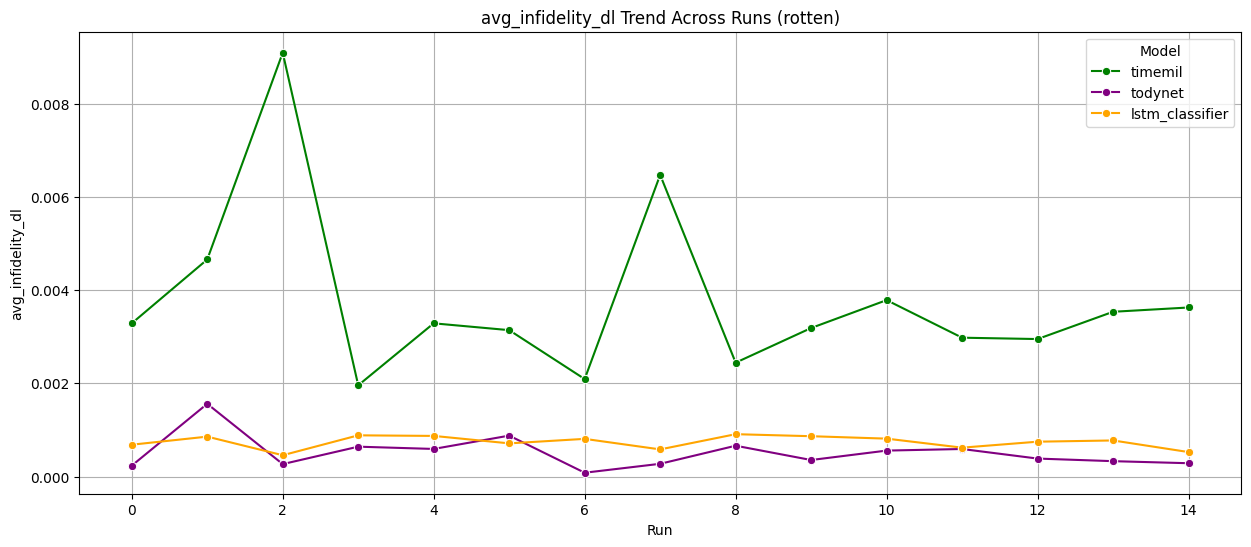

<ipython-input-69-9c96c355839d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


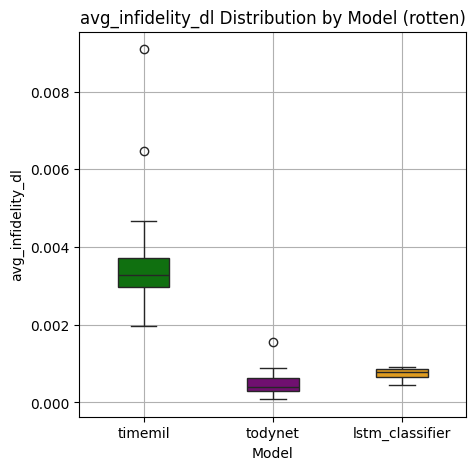

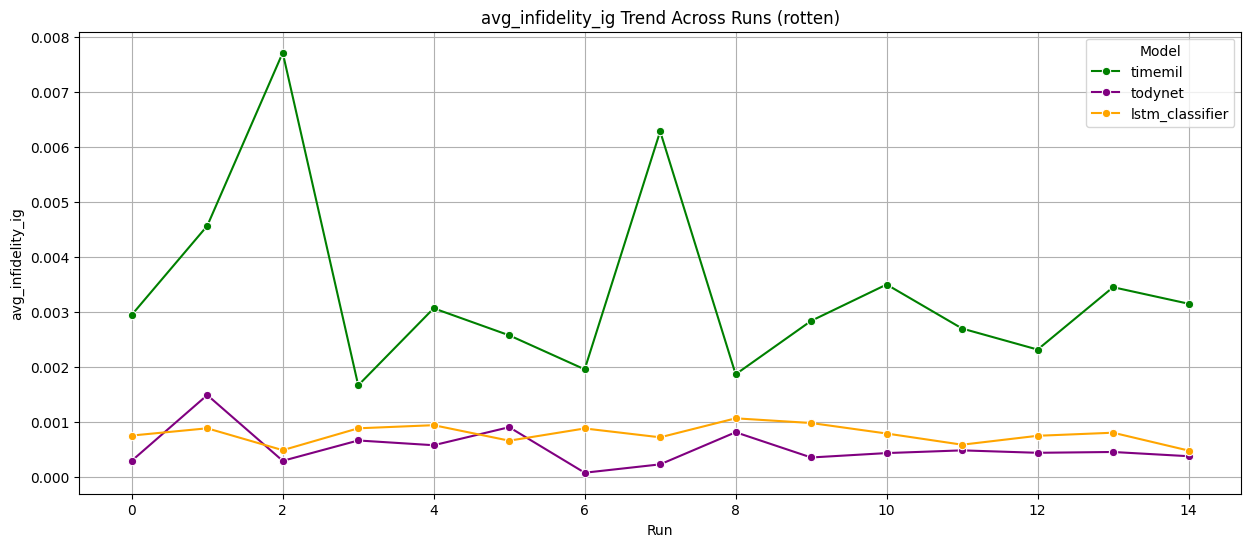

<ipython-input-69-9c96c355839d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


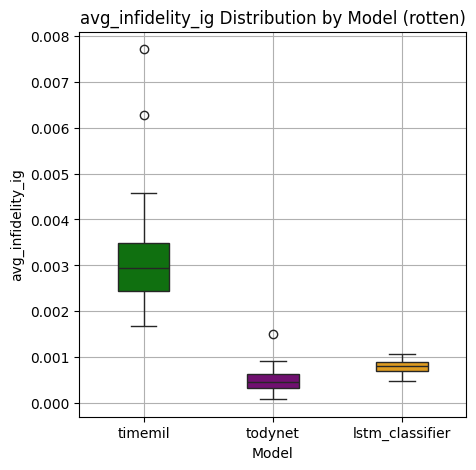

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_performance_seaborn(dataset_df, dataset_name):
    metrics = ['avg_infidelity_dl', 'avg_infidelity_ig']
    # Define colors for each model
    model_colors = {
        'timemil': 'green',
        'todynet': 'purple',
        'lstm_classifier': 'orange'
    }

    # Create a color palette for the models
    palette = {model: color for model, color in model_colors.items()}

    # Create line charts and box plots for each metric
    for metric in metrics:
        # Line Chart
        plt.figure(figsize=(15, 6))
        sns.lineplot(
            data=dataset_df,
            x='run',
            y=metric,
            hue='model',
            palette=palette,
            marker='o'
        )
        plt.title(f'{metric} Trend Across Runs ({dataset_name})')
        plt.xlabel('Run')
        plt.ylabel(metric)
        plt.legend(title='Model')
        plt.grid(True)
        plt.show()

        # Box Plot
        plt.figure(figsize=(5, 5))
        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            palette=palette,
            width=0.4,
            # linewidth=0.8  # Adjust this value to make the boxes thinner

        )
        plt.title(f'{metric} Distribution by Model ({dataset_name})')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.grid(True)
        plt.show()




In [ ]:
# Example usage for 'rotten' dataset
plot_model_performance_seaborn(dataset_metrics['rotten'], 'rotten')

In [ ]:
# Example usage for 'rotten' dataset
plot_model_performance_seaborn(dataset_metrics['imdb'], 'imdb')

In [ ]:
# Example usage for 'rotten' dataset
plot_model_performance_seaborn(dataset_metrics['twitter'], 'twitter')

## Ranking of Results across Runs

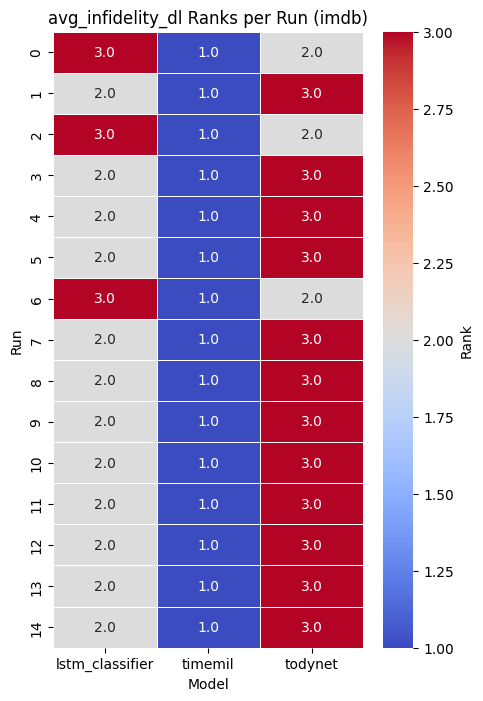

<ipython-input-70-eb7987665750>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


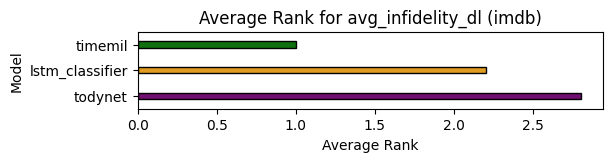

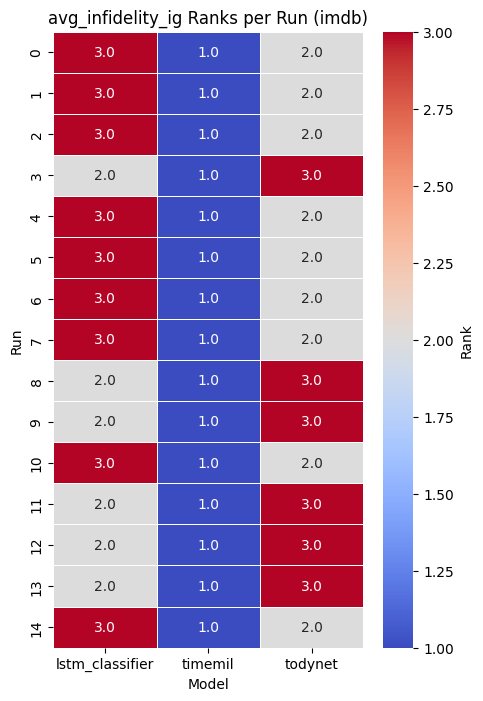

<ipython-input-70-eb7987665750>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


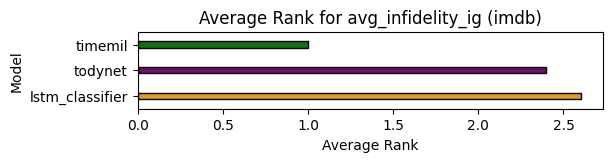

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_ranks(dataset_df, dataset_name):
    metrics = ['avg_infidelity_dl', 'avg_infidelity_ig']

    # Define colors for each model
    model_colors = {
        'timemil': 'green',
        'todynet': 'purple',
        'lstm_classifier': 'orange'
    }
    # Create a color palette for heatmap and bar plot
    palette = {model: model_colors[model] for model in dataset_df['model'].unique()}

    for metric in metrics:
        # Calculate ranks for each run
        rank_df = dataset_df.pivot(index='run', columns='model', values=metric)
        rank_df = rank_df.rank(axis=1, ascending=(metric == 'test_loss'))  # Lower is better for test_loss

        # Compute average ranks
        avg_ranks = rank_df.mean(axis=0).sort_values()

        # Heatmap for ranks per run
        plt.figure(figsize=(5, 8))
        sns.heatmap(
            rank_df,
            annot=True,
            cmap='coolwarm',
            fmt=".1f",
            cbar_kws={'label': 'Rank'},
            linewidths=0.5
        )
        plt.title(f'{metric} Ranks per Run ({dataset_name})')
        plt.xlabel('Model')
        plt.ylabel('Run')
        plt.show()

        # Bar plot for average ranks
        plt.figure(figsize=(6, 1))
        sns.barplot(
            x=avg_ranks.values,
            y=avg_ranks.index,
            palette=[palette[model] for model in avg_ranks.index],  # Apply color coding
            edgecolor='black',
            width=0.25
            )
        plt.title(f'Average Rank for {metric} ({dataset_name})')
        plt.xlabel('Average Rank')
        plt.ylabel('Model')
        plt.show()



In [ ]:
# Example usage for 'rotten' dataset
plot_model_ranks(dataset_metrics['rotten'], 'rotten')

In [ ]:
# Example usage for 'rotten' dataset
plot_model_ranks(dataset_metrics['imdb'], 'imdb')

In [ ]:
# Example usage for 'rotten' dataset
plot_model_ranks(dataset_metrics['twitter'], 'twitter')

In [ ]:
!pip install scikit-posthocs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import scikit_posthocs as sp
# from scipy.stats import rankdata

# def plot_cd_diagram_with_pvalues(dataset_df, dataset_name):
#     metrics = ['test_loss', 'test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_auc']

#     for metric in metrics:
#         # Pivot the data to get a matrix of runs (rows) x models (columns)
#         rank_df = dataset_df.pivot(index='run', columns='model', values=metric)
#         rank_df = rank_df.rank(axis=1, ascending=(metric == 'test_loss'))  # Lower is better for test_loss

#         # Compute average ranks
#         avg_ranks = rank_df.mean(axis=0)
#         models = avg_ranks.index.tolist()

#         # Perform Friedman test and Posthoc Nemenyi test
#         p_value = sp.posthoc_nemenyi_friedman(rank_df.values)

#         # Generate pairwise p-values as a DataFrame
#         p_values_matrix = sp.posthoc_nemenyi_friedman(rank_df.values)
#         p_values_df = pd.DataFrame(p_values_matrix, index=models, columns=models)

#         # Display pairwise p-values as a heatmap
#         plt.figure(figsize=(10, 8))
#         sns.heatmap(p_values_df, annot=True, fmt=".2e", cmap="coolwarm", cbar_kws={'label': 'p-value'})
#         plt.title(f'Pairwise p-values for {metric} ({dataset_name})')
#         plt.xlabel('Model')
#         plt.ylabel('Model')
#         plt.show()

#         # Create Critical Difference Diagram
#         plt.figure(figsize=(12, 6))
#         sp.sign_plot(x=avg_ranks.values, names=models, alpha=0.05, title=f'CD Diagram for {metric} ({dataset_name})')
#         plt.show()

# # Example usage for 'rotten' dataset
# plot_cd_diagram_with_pvalues(dataset_metrics['rotten'], 'rotten')


# Hypothesis Testing V2


=== Testing Differences in avg_infidelity_ig between timemil and lstm_classifier on rotten ===
Shapiro-Wilk Test: stat = 0.820379, p-value = 0.006795
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 11.483799, p-value = 0.002102
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


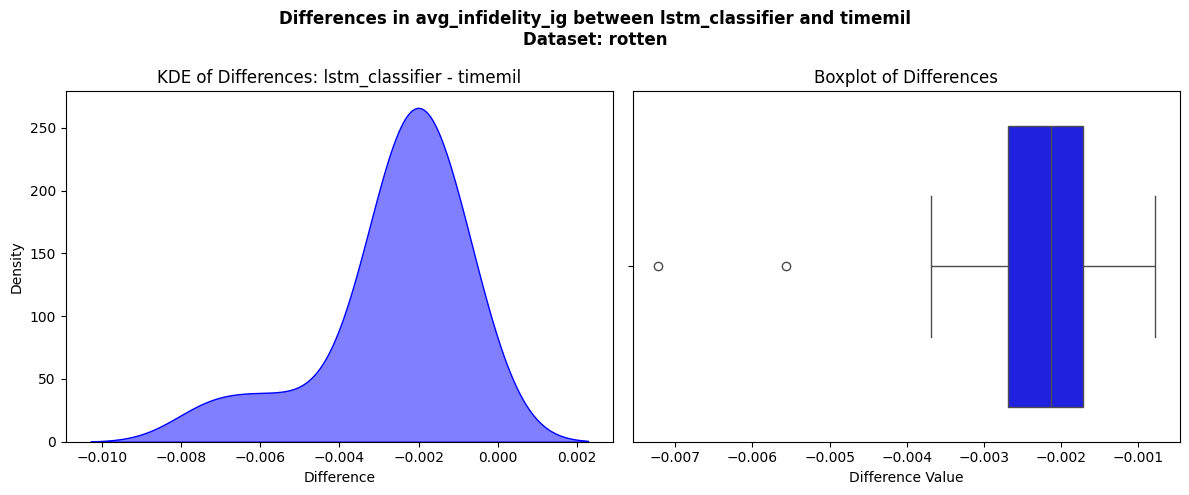


=== Testing Differences in avg_infidelity_ig between timemil and todynet on rotten ===
Shapiro-Wilk Test: stat = 0.786436, p-value = 0.002475
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 8.888114, p-value = 0.005883
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


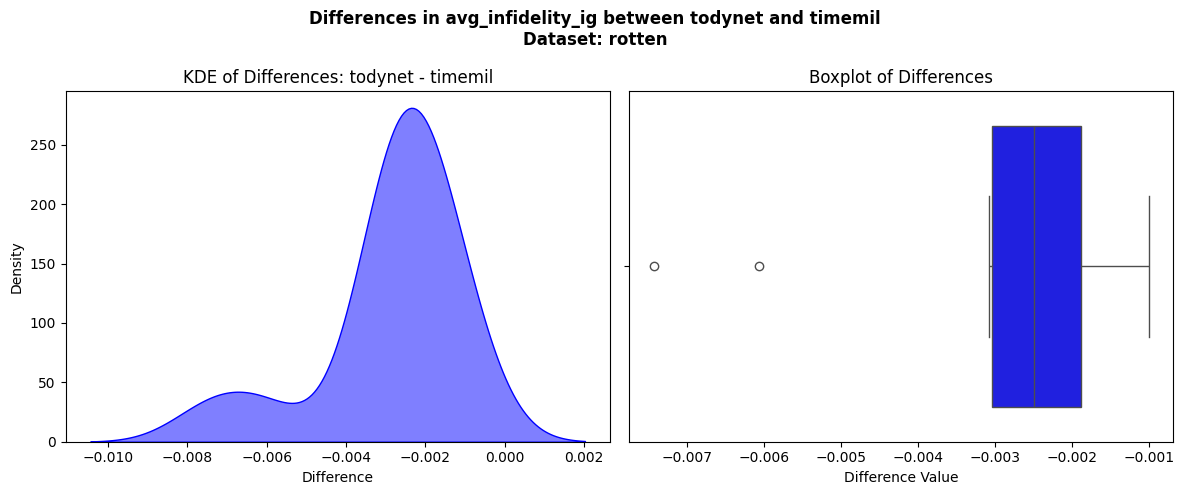


=== Testing Differences in avg_infidelity_dl between timemil and lstm_classifier on rotten ===
Shapiro-Wilk Test: stat = 0.760037, p-value = 0.001180
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 9.510788, p-value = 0.004559
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


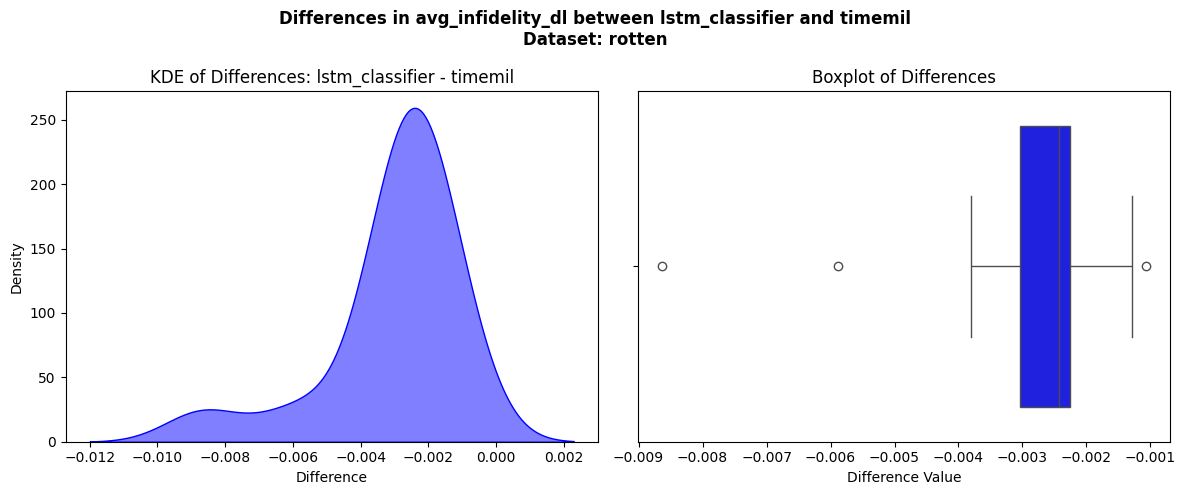


=== Testing Differences in avg_infidelity_dl between timemil and todynet on rotten ===
Shapiro-Wilk Test: stat = 0.724110, p-value = 0.000456
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 7.039574, p-value = 0.012989
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


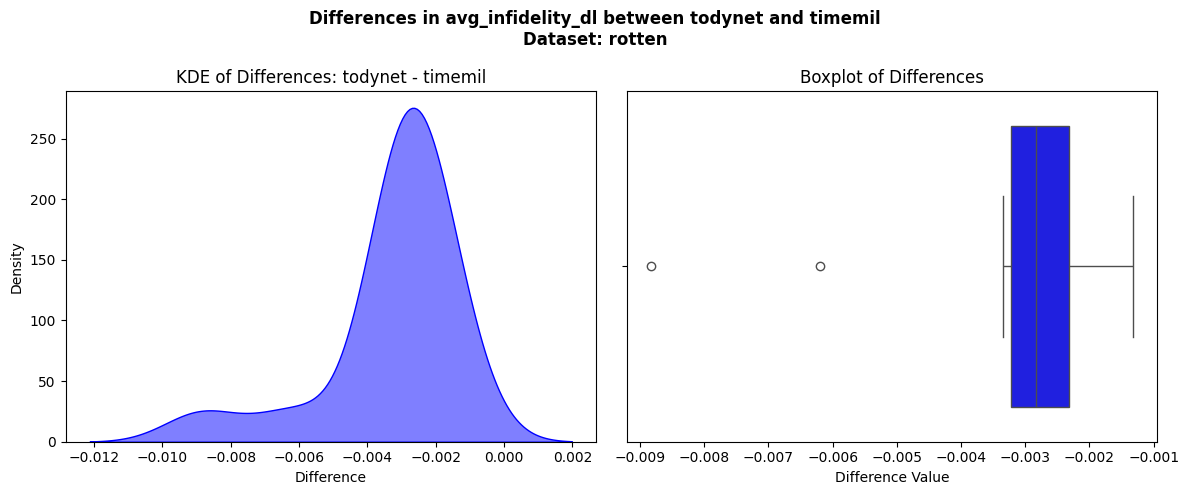


=== Testing Differences in avg_infidelity_ig between timemil and lstm_classifier on imdb ===
Shapiro-Wilk Test: stat = 0.825790, p-value = 0.008033
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 18.008380, p-value = 0.000218
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


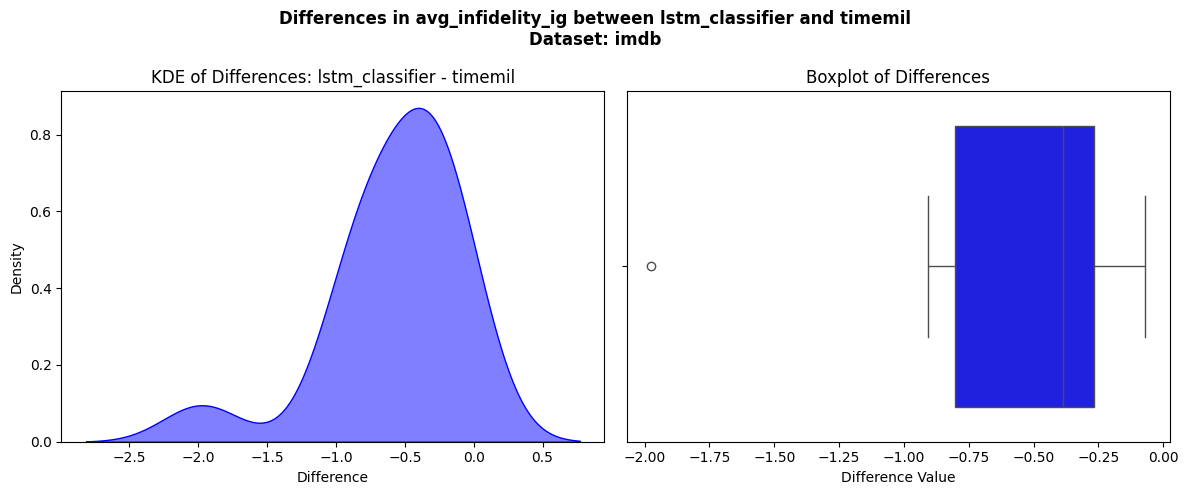


=== Testing Differences in avg_infidelity_ig between timemil and todynet on imdb ===
Shapiro-Wilk Test: stat = 0.825815, p-value = 0.008040
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 17.973907, p-value = 0.000220
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


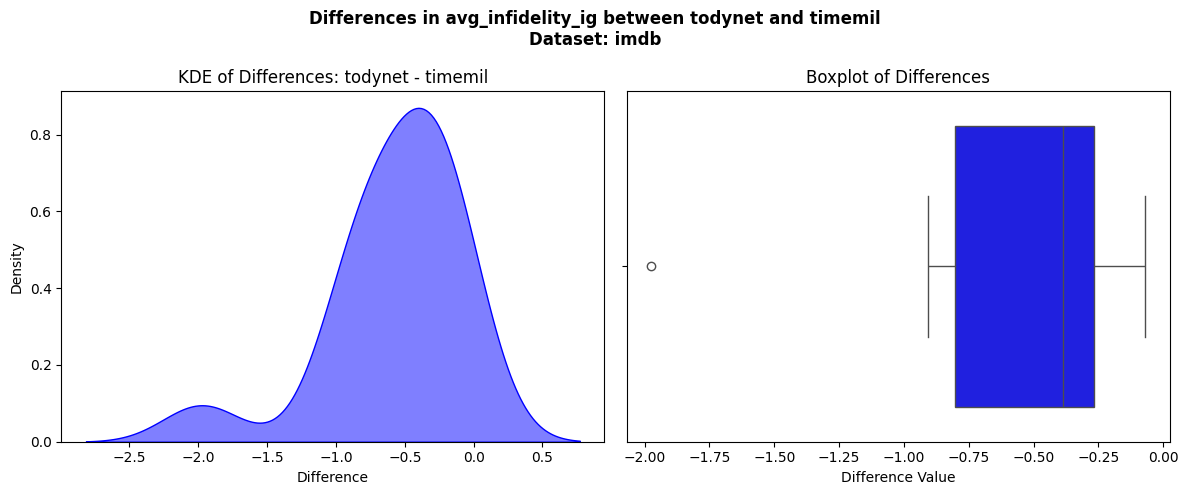


=== Testing Differences in avg_infidelity_dl between timemil and lstm_classifier on imdb ===
Shapiro-Wilk Test: stat = 0.776234, p-value = 0.001851
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 17.048136, p-value = 0.000297
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


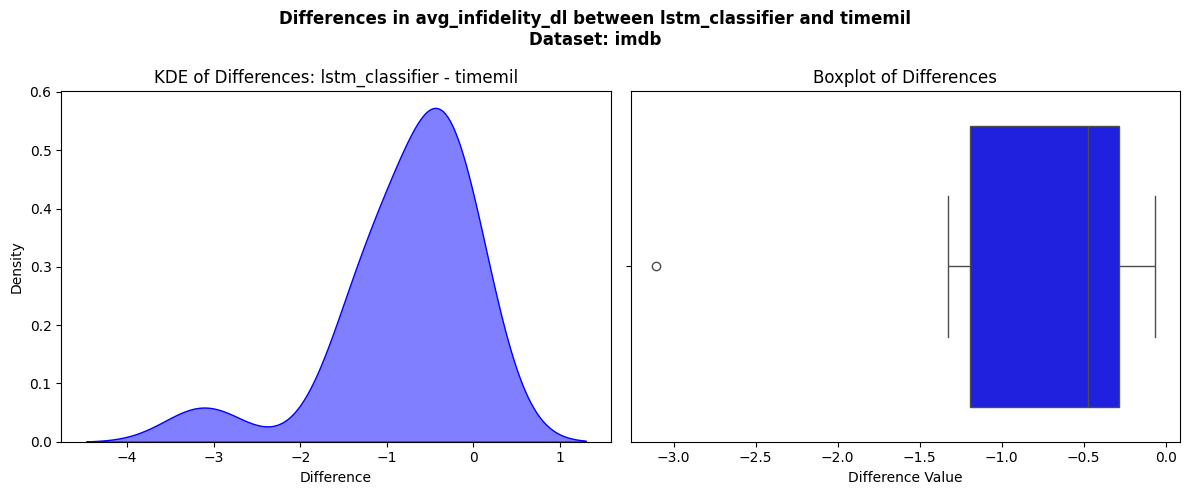


=== Testing Differences in avg_infidelity_dl between timemil and todynet on imdb ===
Shapiro-Wilk Test: stat = 0.776328, p-value = 0.001856
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 17.030553, p-value = 0.000299
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


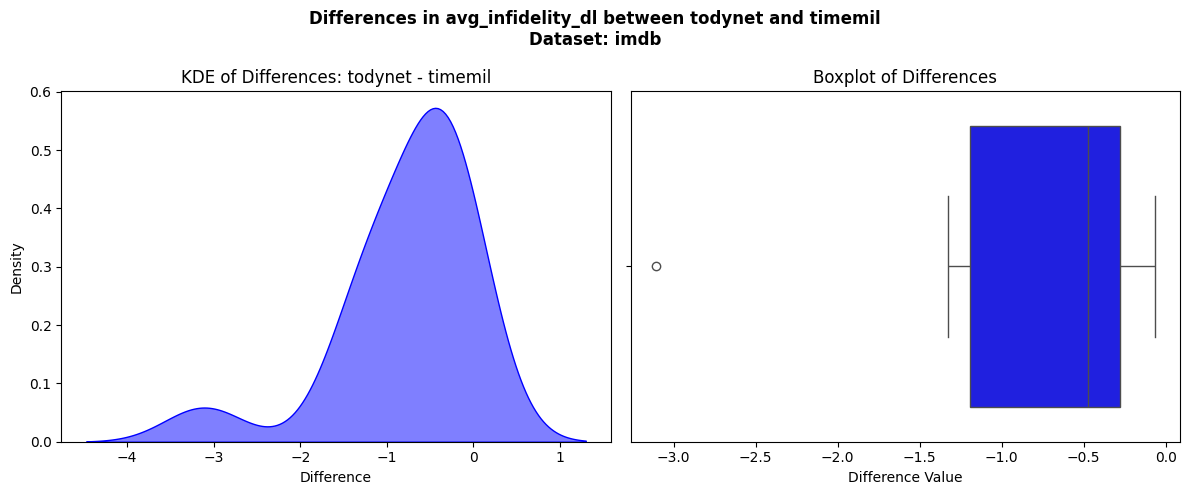


=== Testing Differences in avg_infidelity_ig between timemil and lstm_classifier on twitter ===
Shapiro-Wilk Test: stat = 0.659770, p-value = 0.000095
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 14.161456, p-value = 0.000790
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


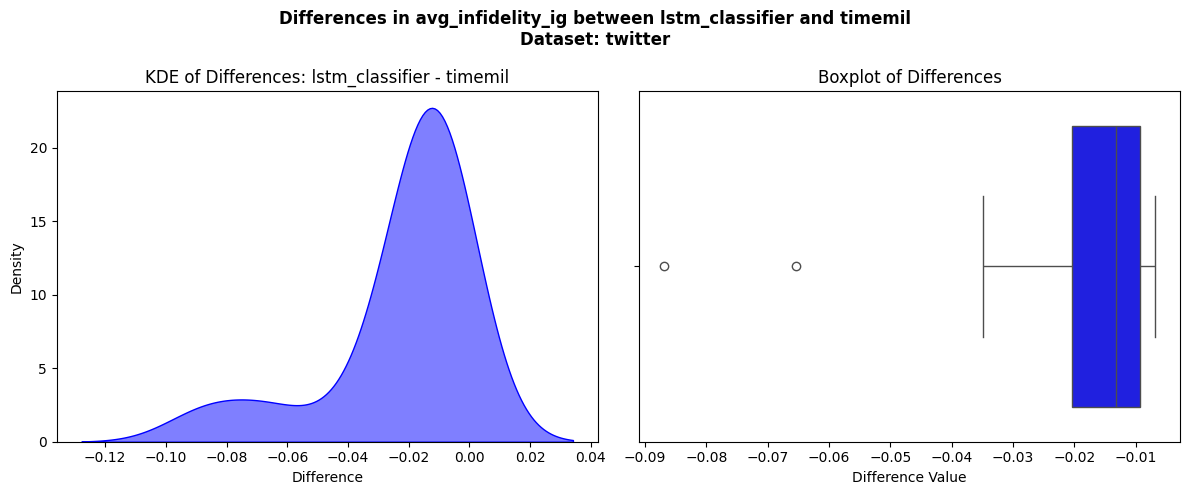


=== Testing Differences in avg_infidelity_ig between timemil and todynet on twitter ===
Shapiro-Wilk Test: stat = 0.647836, p-value = 0.000073
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 13.423490, p-value = 0.001027
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


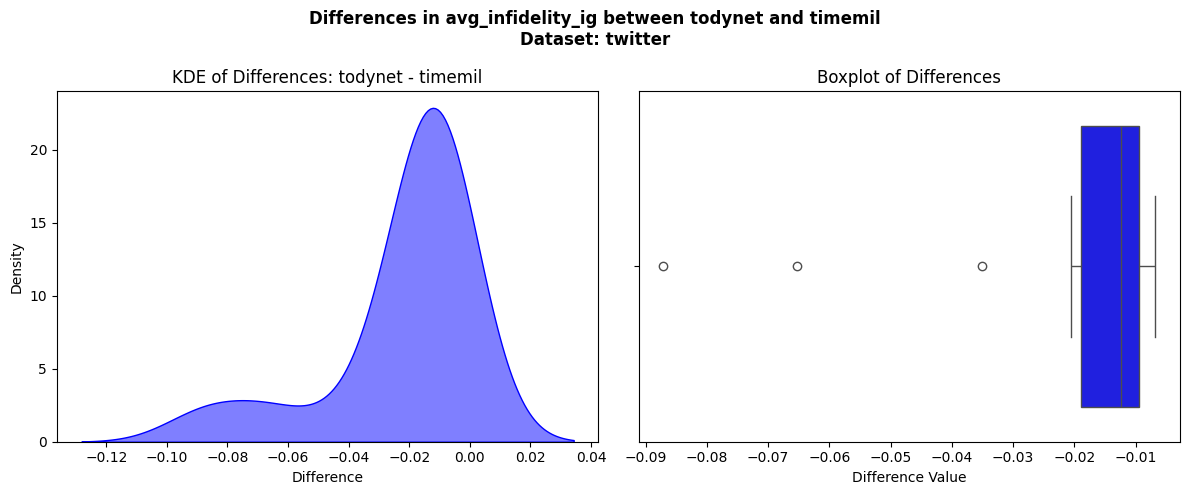


=== Testing Differences in avg_infidelity_dl between timemil and lstm_classifier on twitter ===
Shapiro-Wilk Test: stat = 0.684341, p-value = 0.000170
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 18.097830, p-value = 0.000212
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. lstm_classifier performs better than timemil on average.


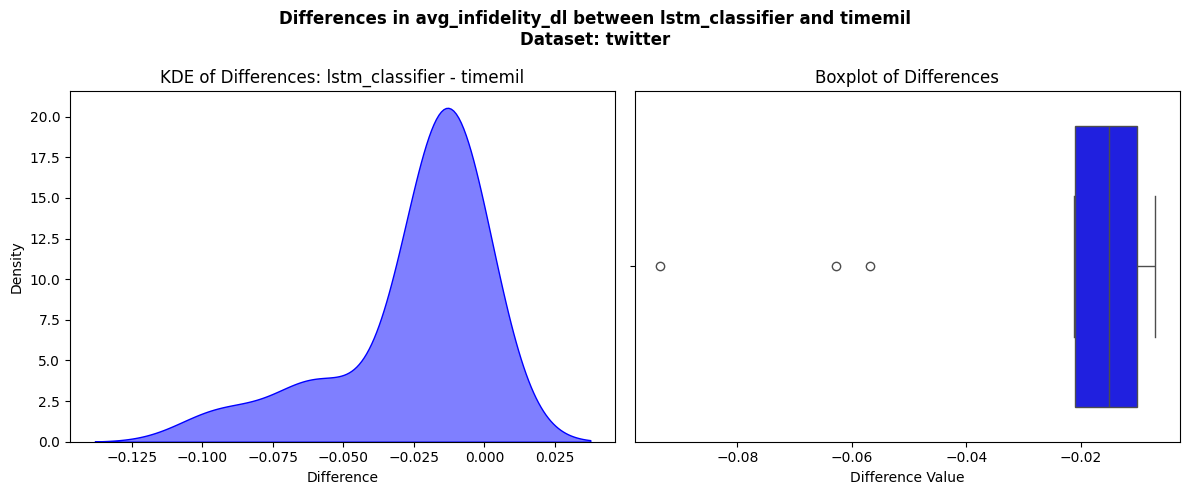


=== Testing Differences in avg_infidelity_dl between timemil and todynet on twitter ===
Shapiro-Wilk Test: stat = 0.672167, p-value = 0.000127
Differences not normally distributed. Consider non-parametric test (Wilcoxon).
Levene's Test for Equal Variances: stat = 17.226265, p-value = 0.000280
Variances differ significantly. Equal variance assumption may not hold.
Wilcoxon signed-rank test result: stat=0.000000, p-value=0.000061
Significant difference found. todynet performs better than timemil on average.


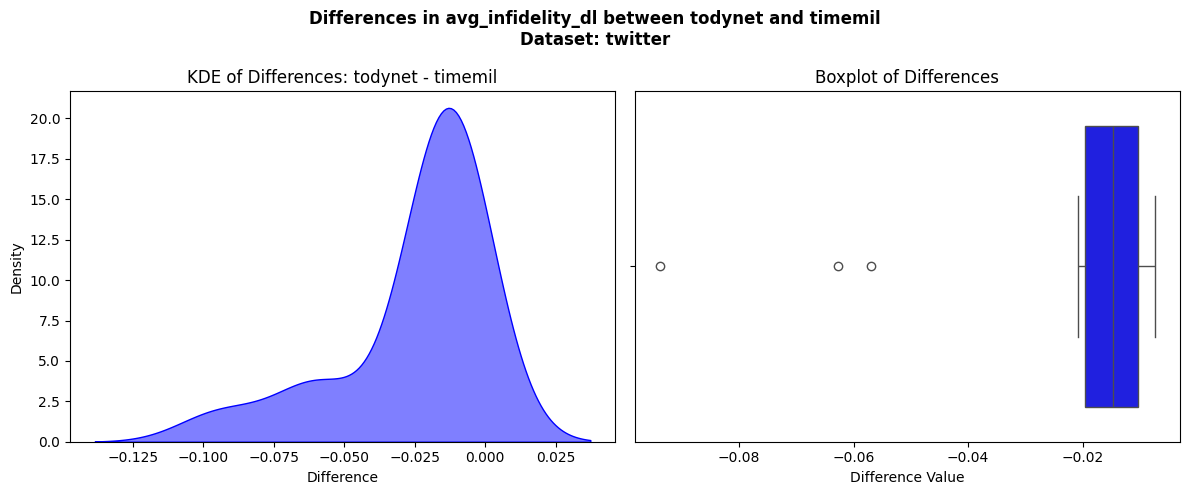


Results with Shapiro, Levene, paired tests, and Bonferroni correction saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/shapiro_comparison_results_interpretability_with_ttest_wilcoxon_bonferroni.xlsx


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_rel, wilcoxon
import pandas as pd

# Optional ANSI color codes
BOLD_RED = "\033[1;31m"
BOLD_GREEN = "\033[1;32m"
BOLD_BLUE = "\033[1;34m"
BOLD_RESET = "\033[0m"

def test_normality_and_variance(dataset_metrics, dataset_name, metric, model_1, model_2):
    """
    Tests:
    - Shapiro-Wilk test for normality on the differences (model_2 - model_1)
    - Levene's test for equality of variances on the original sets of scores
    - Depending on normality:
        - If normal: paired t-test on differences
        - If not normal: Wilcoxon signed-rank test
    Also plots the distributions and determines which model performs better on average.

    Returns a dictionary of results or None if an issue occurs.
    """
    print(BOLD_BLUE + f"\n=== Testing Differences in {metric} between {model_1} and {model_2} on {dataset_name} ===" + BOLD_RESET)

    if dataset_name not in dataset_metrics:
        print(f"Dataset '{dataset_name}' not found in dataset_metrics.")
        return None

    df = dataset_metrics[dataset_name]

    if metric not in df.columns:
        print(f"Metric '{metric}' not found in the DataFrame for {dataset_name}.")
        return None

    # Pivot to align runs
    pivot_df = df.pivot(index='run', columns='model', values=metric)

    if model_1 not in pivot_df.columns or model_2 not in pivot_df.columns:
        print(f"One or both models ('{model_1}', '{model_2}') are not present in the {dataset_name} dataset.")
        return None

    # Extract values
    values_model_1 = pivot_df[model_1].dropna()
    values_model_2 = pivot_df[model_2].dropna()

    # For Shapiro test: compute differences model_2 - model_1
    differences = values_model_2.reindex(values_model_1.index, fill_value=pd.NA) - values_model_1
    differences = differences.dropna()
    if differences.empty:
        print("No valid runs to compare differences.")
        return None

    # Check which model performs better on average
    # After computing differences = values_model_2 - values_model_1
    mean_diff = differences.mean()
    if mean_diff > 0:
        # model_2 infidelity > model_1 infidelity => model_1 is better because lower is better
        better_model = model_1
        worse_model = model_2
    elif mean_diff < 0:
        # model_2 infidelity < model_1 infidelity => model_2 is better
        better_model = model_2
        worse_model = model_1
    else:
        better_model = None
        worse_model = None

    # Shapiro-Wilk test on differences
    shapiro_stat, shapiro_p = shapiro(differences)
    print(f"Shapiro-Wilk Test: stat = {shapiro_stat:.6f}, p-value = {shapiro_p:.6f}")
    if shapiro_p > 0.05:
        shapiro_interpretation = "Differences appear normally distributed. Parametric test (paired t-test) is suitable."
        print(BOLD_GREEN + shapiro_interpretation + BOLD_RESET)
        normal_distribution = True
    else:
        shapiro_interpretation = "Differences not normally distributed. Consider non-parametric test (Wilcoxon)."
        print(BOLD_RED + shapiro_interpretation + BOLD_RESET)
        normal_distribution = False

    # Levene's test for equal variances
    levene_stat, levene_p = levene(values_model_1, values_model_2, center='mean')
    print(f"Levene's Test for Equal Variances: stat = {levene_stat:.6f}, p-value = {levene_p:.6f}")
    if levene_p > 0.05:
        levene_interpretation = "Variances are not significantly different. Equal variance assumption is reasonable."
        print(BOLD_GREEN + levene_interpretation + BOLD_RESET)
    else:
        levene_interpretation = "Variances differ significantly. Equal variance assumption may not hold."
        print(BOLD_RED + levene_interpretation + BOLD_RESET)

    # Perform paired test depending on normality
    if normal_distribution:
        # Paired t-test
        test_used = "paired t-test"
        test_stat, test_p = ttest_rel(values_model_2, values_model_1, nan_policy='omit')
    else:
        # Wilcoxon signed-rank test
        test_used = "Wilcoxon signed-rank test"
        test_stat, test_p = wilcoxon(values_model_2, values_model_1, zero_method='wilcox')

    # Interpret the hypothesis test
    if test_p < 0.05:
        # Significant difference
        if better_model is not None:
            test_interpretation = f"Significant difference found. {better_model} performs better than {worse_model} on average."
        else:
            test_interpretation = "Significant difference found, but mean difference is zero (check data)."
    else:
        # No significant difference
        test_interpretation = "No significant difference found. Both models perform similarly."

    print(BOLD_BLUE + f"{test_used.capitalize()} result: stat={test_stat:.6f}, p-value={test_p:.6f}" + BOLD_RESET)
    if test_p < 0.05:
        print(BOLD_GREEN + test_interpretation + BOLD_RESET)
    else:
        print(BOLD_RED + test_interpretation + BOLD_RESET)

    # Plot the distribution of differences
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # KDE plot of differences
    sns.kdeplot(x=differences, ax=axs[0], fill=True, color='blue', alpha=0.5)
    axs[0].set_title(f'KDE of Differences: {model_2} - {model_1}')
    axs[0].set_xlabel('Difference')
    axs[0].set_ylabel('Density')

    # Boxplot of differences
    sns.boxplot(x=differences, ax=axs[1], color='blue')
    axs[1].set_title('Boxplot of Differences')
    axs[1].set_xlabel('Difference Value')

    # Add a super-title
    plt.suptitle(f"Differences in {metric} between {model_2} and {model_1}\nDataset: {dataset_name}", fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Prepare the result dict
    result = {
        'Metric': metric,
        'MIL-Model': model_1,
        'Compared Model': model_2,
        'Shapiro_stat': shapiro_stat,
        'Shapiro_p-value': shapiro_p,
        'Shapiro_interpretation': shapiro_interpretation,
        'Levene_stat': levene_stat,
        'Levene_p-value': levene_p,
        'Levene_interpretation': levene_interpretation,
        'Test_used': test_used,
        'Test_stat': test_stat,
        'Test_p-value': test_p,
        'Test_interpretation': test_interpretation
    }

    return result

def run_all_comparisons_with_levene(dataset_metrics, output_path):
    """
    Runs all requested comparisons of differences between models, performs Shapiro, Levene,
    and paired hypothesis tests (t-test or Wilcoxon depending on normality),
    then applies Bonferroni correction to the final test p-values across all comparisons,
    and saves results into an Excel file.

    Comparisons:
    - Datasets: rotten, imdb, twitter
    - Metrics: F1 (test_f1), AUROC (test_auc)
    - Model pairs:
        timemil vs lstm_classifier
        timemil vs todynet
    """

    datasets = ['rotten', 'imdb', 'twitter']
    metrics = {
        'IG_Infidelity': 'avg_infidelity_ig',
        'DL_Infidelity': 'avg_infidelity_dl'
    }
    pairs = [
        ('timemil', 'lstm_classifier'),
        ('timemil', 'todynet')
    ]

    results = []

    # Run all comparisons
    for ds in datasets:
        for metric_name, metric_col in metrics.items():
            for m1, m2 in pairs:
                res = test_normality_and_variance(dataset_metrics, ds, metric_col, m1, m2)
                if res is not None:
                    # Adjust the Metric field to the human-readable name (F1 or AUROC)
                    res['Metric'] = metric_name
                    res["Dataset"] = ds
                    results.append(res)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results, columns=[
        "Dataset",
        'Metric',
        'MIL-Model',
        'Compared Model',
        'Shapiro_stat',
        'Shapiro_p-value',
        'Shapiro_interpretation',
        'Levene_stat',
        'Levene_p-value',
        'Levene_interpretation',
        'Test_used',
        'Test_stat',
        'Test_p-value',
        'Test_interpretation'
    ])

    # Apply Bonferroni correction to the final test p-values
    n_tests = len(results_df)
    # Bonferroni correction: multiply p-values by number of tests, cap at 1
    bonferroni_corrected_p = results_df['Test_p-value'] * n_tests
    bonferroni_corrected_p = bonferroni_corrected_p.clip(upper=1.0)

    results_df['Bonferroni_corrected_p-value'] = bonferroni_corrected_p

    # Interpretation after Bonferroni correction
    corrected_interpretations = []
    for i, row in results_df.iterrows():
        p = row['Bonferroni_corrected_p-value']
        if p < 0.05:
            # Still significant after correction
            if "performs better" in row['Test_interpretation']:
                corrected_interpretations.append(row['Test_interpretation'] + " (significant after Bonferroni correction)")
            else:
                corrected_interpretations.append("Significant difference found after Bonferroni correction.")
        else:
            # No longer significant after correction
            corrected_interpretations.append("No significant difference after Bonferroni correction.")

    results_df['Bonferroni_interpretation'] = corrected_interpretations

    # Save to Excel
    results_df.to_excel(output_path, index=False)
    print(BOLD_BLUE + f"\nResults with Shapiro, Levene, paired tests, and Bonferroni correction saved to {output_path}" + BOLD_RESET)


# Example usage:
output_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/shapiro_comparison_results_interpretability_with_ttest_wilcoxon_bonferroni.xlsx"
run_all_comparisons_with_levene(dataset_metrics, output_path)


In [ ]:
import pandas as pd
import numpy as np
from deepsig import aso
import matplotlib.pyplot as plt

# Optional ANSI color codes
BOLD_RED = "\033[1;31m"
BOLD_GREEN = "\033[1;32m"
BOLD_BLUE = "\033[1;34m"
BOLD_RESET = "\033[0m"

def is_lower_better(metric_name):
    # Adjust this function to identify which metrics are lower better.
    # Here, we consider "infidelity" metrics to be lower-is-better.
    return "infidelity" in metric_name.lower()

def test_ASO_on_pair(dataset_metrics, dataset_name, metric, model_1, model_2, total_comparisons, confidence_level=0.95, seed=1234):
    """
    Performs the ASO test between two models on a given metric for a specified dataset.
    Assumes dataset_metrics[dataset_name] is a DataFrame with columns ['model', 'dataset', 'run', <metric>].

    Parameters
    ----------
    dataset_metrics : dict
        Dictionary of datasets, each a DataFrame.
    dataset_name : str
        Name of the dataset (e.g., 'rotten', 'imdb', 'twitter').
    metric : str
        The metric column to compare (e.g., 'test_f1', 'avg_infidelity_ig').
    model_1 : str
        Name of the first model.
    model_2 : str
        Name of the second model.
    total_comparisons : int
        The total number of comparisons planned, used for Bonferroni correction in ASO.
    confidence_level : float
        Confidence level for the ASO test (default 0.95).
    seed : int
        Random seed for ASO reproducibility.

    Returns
    -------
    dict or None
        A dictionary containing results including eps_min and interpretation,
        or None if something goes wrong.
    """
    print(BOLD_BLUE + f"\n=== ASO Test for {metric} between {model_1} and {model_2} on {dataset_name} ===" + BOLD_RESET)

    if dataset_name not in dataset_metrics:
        print(f"Dataset '{dataset_name}' not found in dataset_metrics.")
        return None

    df = dataset_metrics[dataset_name]

    if metric not in df.columns:
        print(f"Metric '{metric}' not found in the DataFrame for {dataset_name}.")
        return None

    # Pivot to align runs
    pivot_df = df.pivot(index='run', columns='model', values=metric)

    if model_1 not in pivot_df.columns or model_2 not in pivot_df.columns:
        print(f"One or both models ('{model_1}', '{model_2}') are not present in the {dataset_name} dataset.")
        return None

    # Extract values
    values_model_1 = pivot_df[model_1].dropna().values
    values_model_2 = pivot_df[model_2].dropna().values

    if len(values_model_1) == 0 or len(values_model_2) == 0:
        print("No valid runs to compare.")
        return None

    # Handle "lower is better": If the metric is lower better, we multiply by -1
    # so that from ASO perspective higher is better.
    if is_lower_better(metric):
        print("lower is better.")
        values_model_1 = -values_model_1
        values_model_2 = -values_model_2

    # Perform ASO test
    # According to documentation, aso(a, b) tests if A is better than B (A stoch. dominates B).
    eps_min = aso(values_model_1, values_model_2, confidence_level=confidence_level, num_comparisons=total_comparisons, seed=seed)

    # Interpretation:
    # If eps_min < 0.5 => model_1 stochastically dominates model_2 => model_1 is better.
    # If eps_min > 0.5 => model_2 is better or we cannot conclude model_1 is better.
    # If eps_min == 0.5 => borderline case.
    if eps_min < 0.5:
        # model_1 is better
        better_model = model_1
        worse_model = model_2
        interpretation = f"ASO: {better_model} is stochastically dominant over {worse_model}."
        print(BOLD_GREEN + interpretation + BOLD_RESET)
    elif eps_min > 0.5:
        # model_2 is better
        better_model = model_2
        worse_model = model_1
        interpretation = f"ASO: {better_model} is stochastically dominant over {worse_model}."
        print(BOLD_RED + interpretation + BOLD_RESET)
    else:
        # eps_min == 0.5
        better_model = None
        worse_model = None
        interpretation = "ASO: Indeterminate dominance (eps_min = 0.5). No clear stochastic dominance."
        print(BOLD_BLUE + interpretation + BOLD_RESET)

    result = {
        'Dataset': dataset_name,
        'Metric': metric,
        'MIL-Model': model_1,
        'Compared Model': model_2,
        'eps_min': eps_min,
        'ASO_interpretation': interpretation
    }

    return result

def run_all_comparisons_ASO(dataset_metrics, output_path, confidence_level=0.95, seed=1234):
    """
    Runs ASO comparisons similar to previous methods (like the normality tests)
    but using the ASO test to compare two models for each dataset and metric.
    Uses Bonferroni correction by specifying num_comparisons.

    Comparisons:
    - Datasets: rotten, imdb, twitter
    - Metrics: For example: ["avg_infidelity_ig", "avg_infidelity_dl"] (adjust as needed)
    - Model pairs:
        timemil vs lstm_classifier
        timemil vs todynet

    Parameters
    ----------
    dataset_metrics : dict
        The dictionary containing the metrics DataFrames.
    output_path : str
        The file path where the resulting Excel file will be saved.
    confidence_level : float
        Confidence level for ASO test.
    seed : int
        Random seed for reproducibility.
    """
    # Define the comparisons you want to run
    datasets = ['rotten', 'imdb', 'twitter']
    # Adjust these metrics if needed:
    # The user can modify metrics to the actual metrics they have.
    metrics = [
        'avg_infidelity_ig',
        'avg_infidelity_dl'
    ]
    pairs = [
        ('timemil', 'lstm_classifier'),
        ('timemil', 'todynet')
    ]

    # Count total number of comparisons for Bonferroni correction
    total_comparisons = len(datasets) * len(metrics) * len(pairs)

    results = []

    for ds in datasets:
        for metric in metrics:
            for m1, m2 in pairs:
                res = test_ASO_on_pair(
                    dataset_metrics, ds, metric, m1, m2,
                    total_comparisons=total_comparisons,
                    confidence_level=confidence_level,
                    seed=seed
                )
                if res is not None:
                    # Adjust the Metric field if needed (already descriptive)
                    results.append(res)

    # Convert to DataFrame
    results_df = pd.DataFrame(results, columns=[
        'Dataset',
        'Metric',
        'MIL-Model',
        'Compared Model',
        'eps_min',
        'ASO_interpretation'
    ])

    # Save to Excel
    results_df.to_excel(output_path, index=False)
    print(BOLD_BLUE + f"\nASO results saved to {output_path}" + BOLD_RESET)


# Example usage (adjust dataset_metrics and output_path accordingly):
output_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/aso_results.xlsx"
run_all_comparisons_ASO(dataset_metrics, output_path)



=== ASO Test for avg_infidelity_ig between timemil and lstm_classifier on rotten ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 304.27it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_ig between timemil and todynet on rotten ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 312.26it/s]


ASO: todynet is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and lstm_classifier on rotten ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 292.82it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and todynet on rotten ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 306.60it/s]


ASO: todynet is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_ig between timemil and lstm_classifier on imdb ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 314.42it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_ig between timemil and todynet on imdb ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 318.37it/s]


ASO: todynet is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and lstm_classifier on imdb ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 289.31it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and todynet on imdb ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 311.42it/s]


ASO: todynet is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_ig between timemil and lstm_classifier on twitter ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 314.01it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_ig between timemil and todynet on twitter ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 311.80it/s]


ASO: todynet is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and lstm_classifier on twitter ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 298.48it/s]


ASO: lstm_classifier is stochastically dominant over timemil.

=== ASO Test for avg_infidelity_dl between timemil and todynet on twitter ===
lower is better.


Bootstrap iterations: 100%|█████████▉| 999/1000 [00:03<00:00, 313.04it/s]


ASO: todynet is stochastically dominant over timemil.

ASO results saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/aso_results.xlsx


Using ASO with a confidence level $\alpha = 0.05$, we found the score distribution of algorithm A based on three
random seeds to be stochastically dominant over B ($\epsilon_\text{min} = 0$).

We compared all pairs of models based on five random seeds each using ASO with a confidence level of
$\alpha = 0.05$ (before adjusting for all pair-wise comparisons using the Bonferroni correction). Almost stochastic
dominance ($\epsilon_\text{min} < \tau$ with $\tau = 0.2$) is indicated in table X.
🎛️ Sample size

In [12]:
import numpy as np
from deepsig import aso, multi_aso, bootstrap_power_analysis, aso_uncertainty_reduction
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def perform_aso_test(model_scores_dict, confidence_level=0.95, seed=1234, return_df=True):
    """
    Perform the ASO test for multiple models and return the comparison matrix.

    Args:
        model_scores_dict (dict): Dictionary containing model scores.
                                  Example: {"Model A": [scores], "Model B": [scores], ...}
        confidence_level (float): Confidence level for ASO test. Default is 0.95.
        seed (int): Random seed for reproducibility. Default is 1234.
        return_df (bool): Whether to return results as a DataFrame. Default is True.

    Returns:
        ASO comparison matrix (DataFrame or array).
    """
    eps_min = multi_aso(
        model_scores_dict,
        confidence_level=confidence_level,
        return_df=return_df,
        seed=seed
    )
    return eps_min


def check_sample_sufficiency(scores_dict, confidence_level=0.95, additional_samples=15, show_progress=False):
    """
    Check whether the number of samples is sufficient using bootstrap power analysis
    and ASO uncertainty reduction, and report impacts of adding samples to each model separately.

    Args:
        scores_dict (dict): Dictionary containing model scores for comparison.
                            Example: {"Model A": [scores], "Model B": [scores], ...}
        confidence_level (float): Confidence level for statistical power analysis. Default is 0.95.
        additional_samples (int): Number of hypothetical additional samples to consider for reduction analysis.
        show_progress (bool): Whether to show progress for bootstrap power analysis. Default is False.

    Returns:
        dict: Contains results of bootstrap power analysis and ASO uncertainty reduction.
    """
    results = {}

    # Bootstrap Power Analysis for each model
    for model_name, scores in scores_dict.items():
        power = bootstrap_power_analysis(scores, show_progress=show_progress)
        results[f"{model_name}_bootstrap_power"] = power

    # ASO Uncertainty Reduction Pairwise Analysis
    models = list(scores_dict.keys())
    for i, model_a in enumerate(models):
        for j, model_b in enumerate(models):
            if i < j:
                scores1 = scores_dict[model_a]
                scores2 = scores_dict[model_b]

                # Current sample sizes
                m_old = len(scores1)
                n_old = len(scores2)

                # Estimate reduction when adding samples to Model A only
                m_new_a = m_old + additional_samples
                reduction_a = aso_uncertainty_reduction(
                    m_old=m_old,
                    n_old=n_old,
                    m_new=m_new_a,
                    n_new=n_old
                )

                # Estimate reduction when adding samples to Model B only
                n_new_b = n_old + additional_samples
                reduction_b = aso_uncertainty_reduction(
                    m_old=m_old,
                    n_old=n_old,
                    m_new=m_old,
                    n_new=n_new_b
                )

                # Add debug prints inside the loop
                print(f"Comparing {model_a} vs {model_b}:")
                print(f"Current samples - {model_a}: {m_old}, {model_b}: {n_old}")
                print(f"Adding samples - {model_a}: {m_new_a}, {model_b}: {n_new_b}")

                # Store results for this model pair
                results[f"ASO_uncertainty_reduction_{model_a}_vs_{model_b}_add_to_{model_a}"] = reduction_a
                results[f"ASO_uncertainty_reduction_{model_a}_vs_{model_b}_add_to_{model_b}"] = reduction_b

    return results



def plot_multi_aso_heatmap(eps_min_matrix, dataset_name, metric_name, output_path=None):
    """
    Plots a heatmap of the multi_aso result matrix with true values (no rounding).

    Parameters
    ----------
    eps_min_matrix : pd.DataFrame or np.array
        The matrix returned by multi_aso (as a DataFrame or array).
        If a DataFrame, the index and columns should represent model names.
    dataset_name : str
        The name of the dataset being analyzed.
    metric_name : str
        The name of the metric being analyzed.
    output_path : str, optional
        File path to save the plot. If None, the plot will be displayed instead of saved.
    """
    plt.figure(figsize=(5, 3))

    if isinstance(eps_min_matrix, pd.DataFrame):
        heatmap_data = eps_min_matrix
    else:
        heatmap_data = pd.DataFrame(
            eps_min_matrix,
            columns=[f"Model {i+1}" for i in range(eps_min_matrix.shape[1])],
            index=[f"Model {i+1}" for i in range(eps_min_matrix.shape[0])]
        )

    # Generate precise annotations
    annotations = heatmap_data.applymap("{:.6f}".format).values

    sns.heatmap(
        heatmap_data,
        annot=annotations,  # Use pre-formatted annotations to prevent rounding
        fmt="s",  # Indicates the annotations are strings
        cmap="coolwarm",
        cbar_kws={'label': 'eps_min'},
        linewidths=0.5
    )

    metric_names = {
        'avg_infidelity_ig': 'IG Infidelity',
        'avg_infidelity_dl': 'DL Infidelity'
    }

    dataset_names = {
        'rotten': 'Rotten Tomatoes',
        'imdb': 'IMDB',
        'twitter': 'Twitter'
    }

    data_name_new = dataset_names.get(dataset_name, dataset_name)
    metric_name_new = metric_names.get(metric_name, metric_name)

    plt.title(f"ASO Heatmap for {metric_name_new} on {data_name_new}")
    # reduce fontsize
    plt.xlabel("Compared Models")
    plt.ylabel("Models")
    plt.xlabel("Compared Models")
    plt.ylabel("Models")

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"Heatmap saved to {output_path}")
    else:
        plt.show()

datasets = ["rotten", "imdb", "twitter"]
metrics = ["avg_infidelity_ig", "avg_infidelity_dl"]

BOLT_GREEN = "\033[1;32m"
BOLT_RED = "\033[1;31m"
BOLT_RESET = "\033[0m"

aso_results = {
    'avg_infidelity_ig': {
        'rotten': None,
        'imdb': None,
        'twitter': None,
    },
    'avg_infidelity_dl': {
        'rotten': None,
        'imdb': None,
        'twitter': None,
    }
}

for dataset in datasets:
  for metric in metrics:

    print(f"\n\n{BOLT_GREEN}Dataset: {dataset}{BOLT_RESET}")
    print(f"{BOLT_GREEN}Metric: {metric}{BOLT_RESET}")

    dataset_name = dataset
    metric_name = metric
    model_a = "timemil"
    model_b = "todynet"
    model_c = "lstm_classifier"

    df_metric_a = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_a][metric_name].values
    df_metric_b = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_b][metric_name].values
    df_metric_c = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_c][metric_name].values

    scores_dict = {
        "TimeMIL": -df_metric_a,
        "TodyNet": -df_metric_b,
        "LSTM": -df_metric_c
    }

    # Perform ASO test
    print("Performing ASO test...")
    confidence_level=0.95
    print(f"Confidence level: {confidence_level}; If epsilon min (upper bound) falls below tau (0.5 or 0.2), the null hypothesis can be rejected.")
    print("Epsilon can be interpreted as a confidence score; The lower it is, the more sure we can be that A is better than B. \n\nIt reads as follows: A is stochastically dominant over B in more cases than vice versa, then the corresponding algorithm can be declared as superior") # -> epsilon < 0.5 means
    comparison_matrix = perform_aso_test(scores_dict, confidence_level=confidence_level)
    print("ASO test results:")
    aso_results[f"{metric_name}"][dataset_name] = comparison_matrix
    print(f"Added to aso_results: {metric_name} for {dataset_name}")
    print(comparison_matrix)
    #plot_multi_aso_heatmap(comparison_matrix, dataset_name, metric_name)
    # Check sample sufficiency
    print("\nChecking sample sufficiency...")
    sufficiency_results = check_sample_sufficiency(scores_dict, confidence_level=confidence_level)
    for key, value in sufficiency_results.items():
        print(f"{key}: {value}")



Dataset: rotten
Metric: avg_infidelity_ig
Performing ASO test...
Confidence level: 0.95; If epsilon min (upper bound) falls below tau (0.5 or 0.2), the null hypothesis can be rejected.
Epsilon can be interpreted as a confidence score; The lower it is, the more sure we can be that A is better than B. 

It reads as follows: A is stochastically dominant over B in more cases than vice versa, then the corresponding algorithm can be declared as superior


Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 284.55it/s]


ASO test results:
Added to aso_results: avg_infidelity_ig for rotten
          TimeMIL   TodyNet      LSTM
TimeMIL  1.000000  0.989937  0.986203
TodyNet  0.029987  1.000000  0.381651
LSTM     0.036467  1.000000  1.000000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.4784
TodyNet_bootstrap_power: 0.3222
LSTM_bootstrap_power: 0.964
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_r

Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 286.08it/s]


ASO test results:
Added to aso_results: avg_infidelity_dl for rotten
          TimeMIL   TodyNet      LSTM
TimeMIL  1.000000  0.989189  0.984488
TodyNet  0.034480  1.000000  0.588422
LSTM     0.041152  1.000000  1.000000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.499
TodyNet_bootstrap_power: 0.2948
LSTM_bootstrap_power: 0.9884
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_r

Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 290.09it/s]


ASO test results:
Added to aso_results: avg_infidelity_ig for imdb
          TimeMIL   TodyNet      LSTM
TimeMIL  1.000000  0.983324  0.983305
TodyNet  0.055800  1.000000  1.000000
LSTM     0.055791  0.196583  1.000000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.2254
TodyNet_bootstrap_power: 0.5512
LSTM_bootstrap_power: 1.0
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_reduc

Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 293.43it/s]


ASO test results:
Added to aso_results: avg_infidelity_dl for imdb
          TimeMIL   TodyNet     LSTM
TimeMIL  1.000000  0.980989  0.98097
TodyNet  0.065289  1.000000  1.00000
LSTM     0.065297  0.734167  1.00000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.175
TodyNet_bootstrap_power: 0.4086
LSTM_bootstrap_power: 0.9924
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_reducti

Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 291.85it/s]


ASO test results:
Added to aso_results: avg_infidelity_ig for twitter
          TimeMIL   TodyNet      LSTM
TimeMIL  1.000000  0.983958  0.983084
TodyNet  0.059748  1.000000  1.000000
LSTM     0.060048  0.593780  1.000000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.176
TodyNet_bootstrap_power: 0.1242
LSTM_bootstrap_power: 0.6474
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_

Model comparisons: 100%|█████████▉| 2997/3000 [00:10<00:00, 280.00it/s]


ASO test results:
Added to aso_results: avg_infidelity_dl for twitter
          TimeMIL   TodyNet      LSTM
TimeMIL  1.000000  0.984502  0.983648
TodyNet  0.055986  1.000000  1.000000
LSTM     0.056539  0.609408  1.000000

Checking sample sufficiency...
Comparing TimeMIL vs TodyNet:
Current samples - TimeMIL: 15, TodyNet: 15
Adding samples - TimeMIL: 30, TodyNet: 30
Comparing TimeMIL vs LSTM:
Current samples - TimeMIL: 15, LSTM: 15
Adding samples - TimeMIL: 30, LSTM: 30
Comparing TodyNet vs LSTM:
Current samples - TodyNet: 15, LSTM: 15
Adding samples - TodyNet: 30, LSTM: 30
TimeMIL_bootstrap_power: 0.178
TodyNet_bootstrap_power: 0.1048
LSTM_bootstrap_power: 0.646
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_TodyNet_add_to_TodyNet: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_TimeMIL: 1.1547005383792515
ASO_uncertainty_reduction_TimeMIL_vs_LSTM_add_to_LSTM: 1.1547005383792515
ASO_uncertainty_r

In [13]:
aso_results

{'avg_infidelity_ig': {'rotten':           TimeMIL   TodyNet      LSTM
  TimeMIL  1.000000  0.989937  0.986203
  TodyNet  0.029987  1.000000  0.381651
  LSTM     0.036467  1.000000  1.000000,
  'imdb':           TimeMIL   TodyNet      LSTM
  TimeMIL  1.000000  0.983324  0.983305
  TodyNet  0.055800  1.000000  1.000000
  LSTM     0.055791  0.196583  1.000000,
  'twitter':           TimeMIL   TodyNet      LSTM
  TimeMIL  1.000000  0.983958  0.983084
  TodyNet  0.059748  1.000000  1.000000
  LSTM     0.060048  0.593780  1.000000},
 'avg_infidelity_dl': {'rotten':           TimeMIL   TodyNet      LSTM
  TimeMIL  1.000000  0.989189  0.984488
  TodyNet  0.034480  1.000000  0.588422
  LSTM     0.041152  1.000000  1.000000,
  'imdb':           TimeMIL   TodyNet     LSTM
  TimeMIL  1.000000  0.980989  0.98097
  TodyNet  0.065289  1.000000  1.00000
  LSTM     0.065297  0.734167  1.00000,
  'twitter':           TimeMIL   TodyNet      LSTM
  TimeMIL  1.000000  0.984502  0.983648
  TodyNet  0.05598

<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = eps_min_matrix.applymap("{:.6f}".format).values
<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = eps_min_matrix.applymap("{:.6f}".format).values
<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = eps_min_matrix.applymap("{:.6f}".format).values
<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = eps_min_matrix.applymap("{:.6f}".format).values
<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = eps_min_matrix.applymap("{:.6f}".format).values
<ipython-input-14-ac200deaee72>:45: FutureWarning: DataFrame.applymap has been deprecated.

NameError: name 'vmin' is not defined

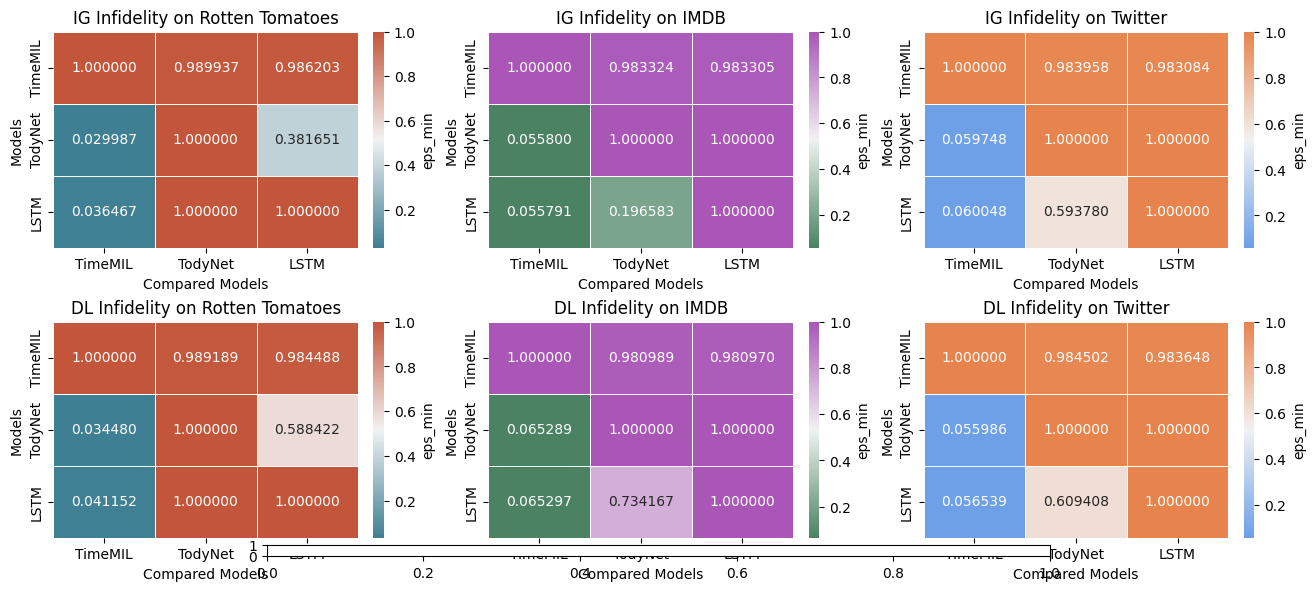

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multi_aso_heatmaps(aso_results, metrics, datasets, output_path=None):
    """
    Plots a grid of heatmaps for multi_aso results, arranged by metrics (rows) and datasets (columns).

    Parameters
    ----------
    aso_results : dict
        A nested dictionary containing the eps_min matrices for each dataset and metric:
        {metric: {dataset: eps_min_matrix}}
    metrics : list
        List of metric names.
    datasets : list
        List of dataset names.
    output_path : str, optional
        File path to save the figure. If None, the figure will be displayed instead of saved.
    """
    n_rows = len(metrics)
    n_cols = len(datasets)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols * 0.725, 4 * n_rows* 0.725), constrained_layout=True)

    for i, metric in enumerate(metrics):
        for j, dataset in enumerate(datasets):
            ax = axes[i, j] if n_rows > 1 and n_cols > 1 else axes[j if n_rows == 1 else i]

            # Retrieve the eps_min matrix for the specific metric and dataset
            eps_min_matrix = aso_results.get(metric, {}).get(dataset, None)
            if eps_min_matrix is None:
                ax.axis("off")
                continue

            if isinstance(eps_min_matrix, np.ndarray):
                eps_min_matrix = pd.DataFrame(
                    eps_min_matrix,
                    columns=[f"Model {i+1}" for i in range(eps_min_matrix.shape[1])],
                    index=[f"Model {i+1}" for i in range(eps_min_matrix.shape[0])]
                )

            # Generate precise annotations
            annotations = eps_min_matrix.applymap("{:.6f}".format).values

            if dataset == "rotten":
                # color = "coolwarm"
                color = sns.diverging_palette(220, 20, as_cmap=True)
            elif dataset == "imdb":
                color = "PRGn"
                color = sns.diverging_palette(145, 300, s=60, as_cmap=True)
            elif dataset == "twitter":
                # color = "PiYG"
                color = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
            else:
                color = "PRGn"

            sns.heatmap(
                eps_min_matrix,
                annot=annotations,  # Use pre-formatted annotations to prevent rounding
                fmt="s",  # Indicates the annotations are strings
                cmap=color,
                cbar_kws={'label': 'eps_min'},
                linewidths=0.5,
                ax=ax
            )

            metric_names = {
                'avg_infidelity_ig': 'IG Infidelity',
                'avg_infidelity_dl': 'DL Infidelity'
            }

            dataset_names = {
                'rotten': 'Rotten Tomatoes',
                'imdb': 'IMDB',
                'twitter': 'Twitter'
            }

            data_name_new = dataset_names.get(dataset, dataset)
            metric_name_new = metric_names.get(metric, metric)

            ax.set_title(f"{metric_name_new} on {data_name_new}")
            ax.set_xlabel("Compared Models")
            ax.set_ylabel("Models")
    # Add a single shared colorbar underneath the entire grid
    cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
    cbar.set_label('eps_min')

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
        print(f"Heatmaps saved to {output_path}")
    else:
        plt.show()

metrics = ['avg_infidelity_ig', 'avg_infidelity_dl']
datasets = ['rotten', 'imdb', 'twitter']

plot_multi_aso_heatmaps(
    aso_results=aso_results,
    metrics=metrics,
    datasets=datasets,
    output_path="aso_heatmaps_grid.png"
)

<ipython-input-15-f5b3173bf267>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-15-f5b3173bf267>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-15-f5b3173bf267>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,


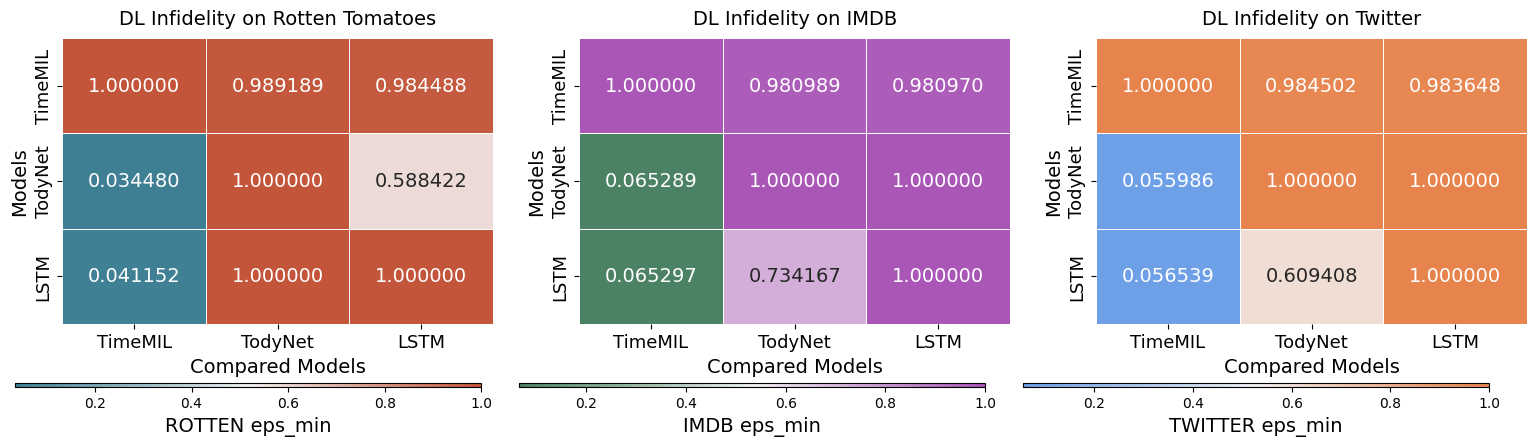

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multi_aso_heatmaps(aso_results, metrics, datasets, output_path=None):
    """
    Plots a grid of heatmaps for multi_aso results, with a separate colormap and colorbar per dataset.

    Parameters
    ----------
    aso_results : dict
        A nested dictionary containing the eps_min matrices for each dataset and metric:
        {metric: {dataset: eps_min_matrix}}
    metrics : list
        List of metric names.
    datasets : list
        List of dataset names.
    output_path : str, optional
        File path to save the figure. If None, the figure will be displayed instead of saved.
    """
    n_rows = len(metrics)
    n_cols = len(datasets)

    # Define colormap for each dataset
    dataset_colormaps = {
        "rotten": sns.diverging_palette(220, 20, as_cmap=True),
        "imdb": sns.diverging_palette(145, 300, s=60, as_cmap=True),
        "twitter": sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
    }

    # Create the subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols * 1.05, 4 * n_rows* 1.05), constrained_layout=False)

    # Adjust spacing for colorbars

    plt.subplots_adjust(hspace= 0.25, bottom=0.2)

    for i, metric in enumerate(metrics):
        for j, dataset in enumerate(datasets):
            ax = axes[i, j] if n_rows > 1 and n_cols > 1 else axes[j if n_rows == 1 else i]

            eps_min_matrix = aso_results.get(metric, {}).get(dataset, None)
            if eps_min_matrix is None:
                ax.axis("off")
                continue

            if isinstance(eps_min_matrix, np.ndarray):
                eps_min_matrix = pd.DataFrame(
                    eps_min_matrix,
                    columns=[f"Model {i+1}" for i in range(eps_min_matrix.shape[1])],
                    index=[f"Model {i+1}" for i in range(eps_min_matrix.shape[0])]
                )

            # Set colormap for the dataset
            cmap = dataset_colormaps.get(dataset, "coolwarm")

            sns.heatmap(
                eps_min_matrix,
                annot=eps_min_matrix.applymap("{:.6f}".format).values,
                fmt="s",
                cmap=cmap,
                cbar=False,  # Suppress individual colorbars
                linewidths=0.5,
                ax=ax,
                annot_kws={"fontsize": 14}  # Set annotation font size
            )

            metric_names = {
                'avg_infidelity_ig': 'IG Infidelity',
                'avg_infidelity_dl': 'DL Infidelity'
            }

            dataset_names = {
                'rotten': 'Rotten Tomatoes',
                'imdb': 'IMDB',
                'twitter': 'Twitter'
            }

            data_name_new = dataset_names.get(dataset, dataset)
            metric_name_new = metric_names.get(metric, metric)

            ax.set_title(
                f"{metric_name_new} on {data_name_new}",
                fontsize=14, pad=10  # Reduce font size and add padding
            )
            ax.tick_params(axis='x', labelsize=13)  # Set font size for x-axis tick labels
            ax.tick_params(axis='y', labelsize=13)  # Set font size for y-axis tick labels
            ax.set_xlabel("Compared Models", fontsize=14)
            ax.set_ylabel("Models", fontsize=14)
            # adding colorbar to subplot

            #cbar.set_label(f'{dataset.upper()} eps_min', fontsize=10)

            #ax.set_aspect(1.5)
            # Adjust the aspect ratio of the heatmap
            # ax.set_aspect(cell_aspect)

            # ax.set_title(f"{metric_name_new} on {data_name_new}")
            # ax.set_xlabel("Compared Models")
            # ax.set_ylabel("Models")

    # Add colorbars beneath each column
    for j, dataset in enumerate(datasets):
        cbar_ax = fig.add_axes([0.1 + j * (0.8 / n_cols), 0.05, 0.8 / n_cols - 0.02, 0.01])  # [left, bottom, width, height]
        cmap = dataset_colormaps.get(dataset, "coolwarm")

        # Find global vmin and vmax for the dataset
        vmin = float('inf')
        vmax = float('-inf')
        for metric in metrics:
            eps_min_matrix = aso_results.get(metric, {}).get(dataset, None)
            if eps_min_matrix is not None:
                vmin = min(vmin, np.min(eps_min_matrix))
                vmax = max(vmax, np.max(eps_min_matrix))

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
        cbar.set_label(f'{dataset.upper()} eps_min', fontsize=14)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
        print(f"Heatmaps saved to {output_path}")
    else:
        plt.show()


metrics = ['avg_infidelity_dl']
datasets = ['rotten', 'imdb', 'twitter']

plot_multi_aso_heatmaps(
    aso_results=aso_results,
    metrics=metrics,
    datasets=datasets,
    #output_path="aso_heatmaps_grid.png"
)

<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=eps_min_matrix.applymap("{:.6f}".format).values,
<ipython-input-16-6480b177aae5>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot

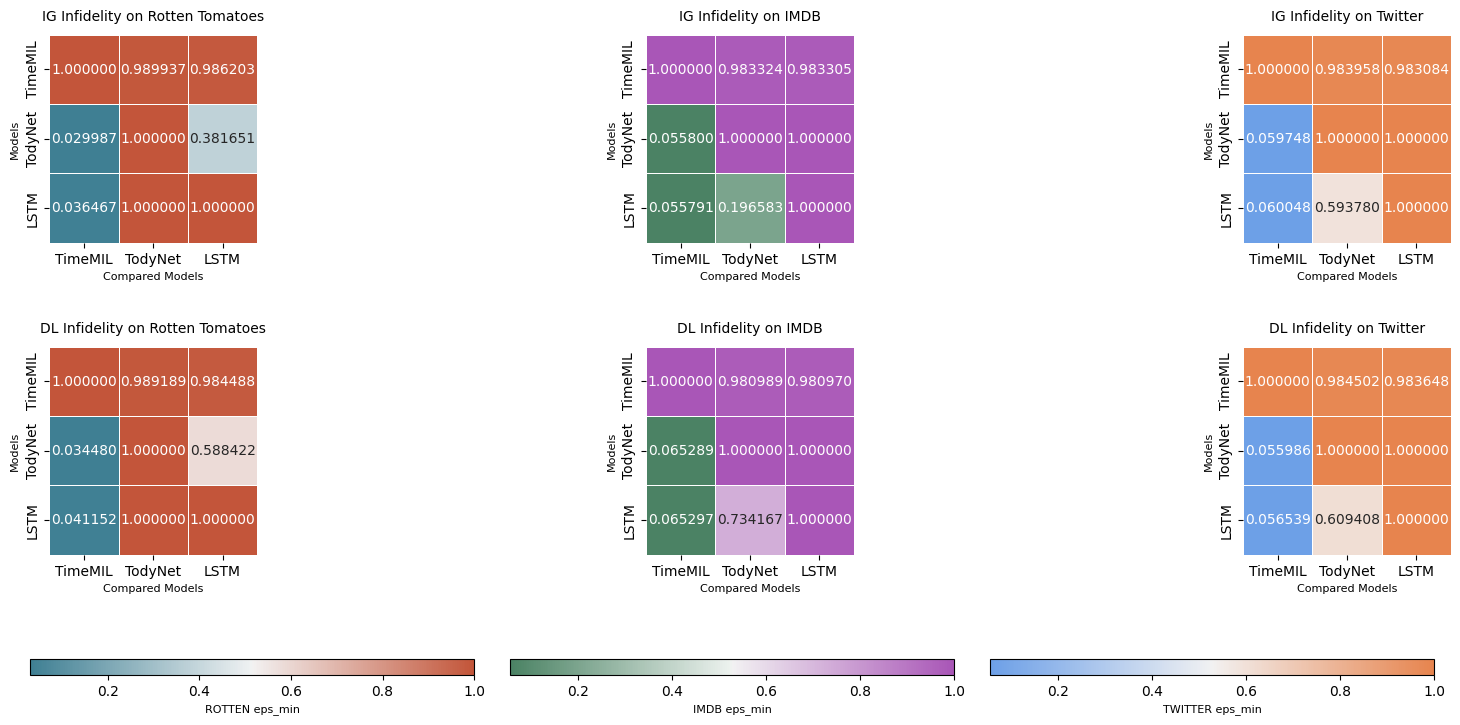

In [ ]:
def plot_multi_aso_heatmaps(aso_results, metrics, datasets, output_path=None, cell_aspect=1.0):
    """
    Plots a grid of heatmaps for multi_aso results, with a separate colormap and colorbar per dataset.
    Adjusted to prevent overplotting.

    Parameters
    ----------
    aso_results : dict
        A nested dictionary containing the eps_min matrices for each dataset and metric:
        {metric: {dataset: eps_min_matrix}}
    metrics : list
        List of metric names.
    datasets : list
        List of dataset names.
    output_path : str, optional
        File path to save the figure. If None, the figure will be displayed instead of saved.
    cell_aspect : float
        Aspect ratio for the cells in the heatmap. Smaller values make cells shorter.
    """
    n_rows = len(metrics)
    n_cols = len(datasets)

    # Define colormap for each dataset
    dataset_colormaps = {
        "rotten": sns.diverging_palette(220, 20, as_cmap=True),
        "imdb": sns.diverging_palette(145, 300, s=60, as_cmap=True),
        "twitter": sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
    }

    # Create the subplot grid
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), constrained_layout=False
    )

    # Adjust spacing for colorbars and subplot padding
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.85, wspace=0.4, hspace=0.5)

    for i, metric in enumerate(metrics):
        for j, dataset in enumerate(datasets):
            ax = axes[i, j] if n_rows > 1 and n_cols > 1 else axes[j if n_rows == 1 else i]

            eps_min_matrix = aso_results.get(metric, {}).get(dataset, None)
            if eps_min_matrix is None:
                ax.axis("off")
                continue

            if isinstance(eps_min_matrix, np.ndarray):
                eps_min_matrix = pd.DataFrame(
                    eps_min_matrix,
                    columns=[f"Model {i+1}" for i in range(eps_min_matrix.shape[1])],
                    index=[f"Model {i+1}" for i in range(eps_min_matrix.shape[0])]
                )

            # Set colormap for the dataset
            cmap = dataset_colormaps.get(dataset, "coolwarm")

            sns.heatmap(
                eps_min_matrix,
                annot=eps_min_matrix.applymap("{:.6f}".format).values,
                fmt="s",
                cmap=cmap,
                cbar=False,  # Suppress individual colorbars
                linewidths=0.5,
                ax=ax
            )

            metric_names = {
                'avg_infidelity_ig': 'IG Infidelity',
                'avg_infidelity_dl': 'DL Infidelity'
            }

            dataset_names = {
                'rotten': 'Rotten Tomatoes',
                'imdb': 'IMDB',
                'twitter': 'Twitter'
            }

            data_name_new = dataset_names.get(dataset, dataset)
            metric_name_new = metric_names.get(metric, metric)

            ax.set_title(
                f"{metric_name_new} on {data_name_new}",
                fontsize=10, pad=10  # Reduce font size and add padding
            )
            ax.set_xlabel("Compared Models", fontsize=8)
            ax.set_ylabel("Models", fontsize=8)

            # Adjust the aspect ratio of the heatmap
            ax.set_aspect(cell_aspect)

    # Add colorbars beneath each column
    for j, dataset in enumerate(datasets):
        cbar_ax = fig.add_axes([0.1 + j * (0.8 / n_cols), 0.05, 0.8 / n_cols - 0.02, 0.02])  # [left, bottom, width, height]
        cmap = dataset_colormaps.get(dataset, "coolwarm")

        # Find global vmin and vmax for the dataset
        vmin = float('inf')
        vmax = float('-inf')
        for metric in metrics:
            eps_min_matrix = aso_results.get(metric, {}).get(dataset, None)
            if eps_min_matrix is not None:
                vmin = min(vmin, np.min(eps_min_matrix))
                vmax = max(vmax, np.max(eps_min_matrix))

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
        cbar.set_label(f'{dataset.upper()} eps_min', fontsize=8)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight", dpi=300)  # Increase DPI for better resolution
        print(f"Heatmaps saved to {output_path}")
    else:
        plt.show()


metrics = ['avg_infidelity_ig', 'avg_infidelity_dl']
datasets = ['rotten', 'imdb', 'twitter']

plot_multi_aso_heatmaps(
    aso_results=aso_results,
    metrics=metrics,
    datasets=datasets,
    #output_path="aso_heatmaps_grid.png"
)

<ipython-input-17-9b3659e5e6ec>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-17-9b3659e5e6ec>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


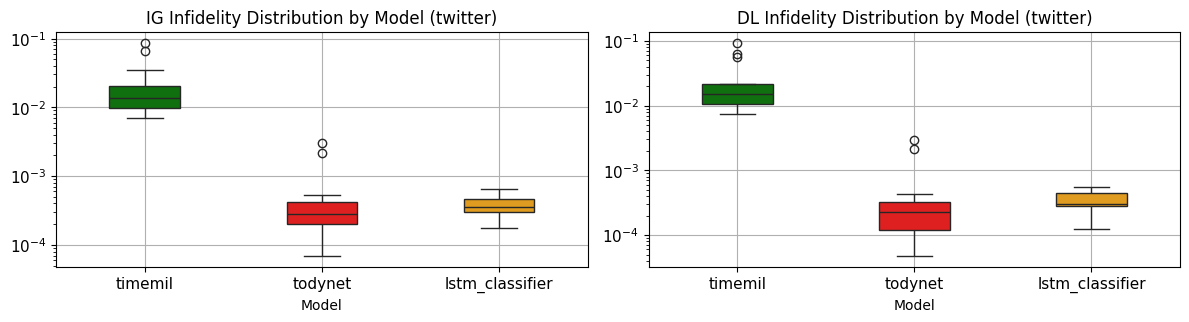

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_boxplots(dataset_df, dataset_name, metrics, models, model_colors):
    """
    Creates a single figure with three boxplots, each for one metric, comparing the performance of different models.

    Parameters:
        dataset_df (pd.DataFrame): DataFrame containing the performance metrics.
        dataset_name (str): Name of the dataset for labeling.
        metrics (list): List of metric names to plot (e.g., ['test_acc', 'test_f1', 'test_auc']).
        models (list): List of model names to include in the plots.
        model_colors (dict): A dictionary mapping model names to specific colors (e.g., {'timemil': 'green', ...}).
    """
    # Create a color palette for the models
    palette = {model: color for model, color in model_colors.items()}

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 3.5), sharey=False)

    metrics = {
        'avg_infidelity_ig': 'IG Infidelity',
        'avg_infidelity_dl': 'DL Infidelity'
        #'avg': 'Accuracy'
    }

    for i, metric in enumerate(metrics):
        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            ax=axes[i],
            palette=palette,
            width=0.4
        )
        axes[i].set_title(f'{metrics[metric]} Distribution by Model ({dataset_name})', fontsize=12)
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(None) # metric, fontsize=12
        # set fonsize of axis labels
        axes[i].tick_params(axis='both', labelsize=11)
        # log scale y axis
        axes[i].set_yscale('log')
        # set font size of title
        axes[i].grid(True)

    # Add a main title for the entire figure
    #plt.suptitle(f'Model Performance Comparison for {dataset_name}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the title
    plt.show()

# Example usage:
dataset_df = dataset_metrics['twitter']  # Replace with your actual dataset
dataset_name = 'twitter'
metrics = ['avg_infidelity_ig', 'avg_nfidelity_dl']
models = ['timemil', 'todynet', 'lstm_classifier']
model_colors = {
    'timemil': 'green',
    'todynet': 'red',
    'lstm_classifier': 'orange'
}

plot_metrics_boxplots(dataset_df, dataset_name, metrics, models, model_colors)

# Hypothesis Testing


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value: 0.0714
  -> Approximately normal distribution.

Model: timemil
Shapiro-Wilk Test p-value: 0.3818
  -> Approximately normal distribution.

Model: todynet
Shapiro-Wilk Test p-value: 0.4012
  -> Approximately normal distribution.


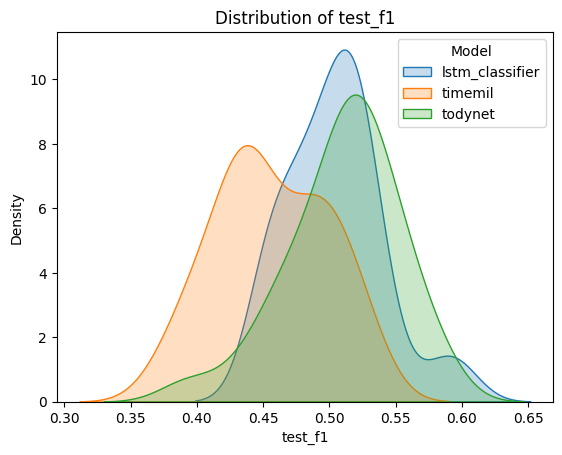


--- ASO Test Results ---


Model comparisons: 100%|█████████▉| 2997/3000 [00:11<00:00, 272.10it/s]


                 lstm_classifier   timemil  todynet
lstm_classifier              1.0  0.000412      1.0
timemil                      1.0  1.000000      1.0
todynet                      1.0  0.008168      1.0


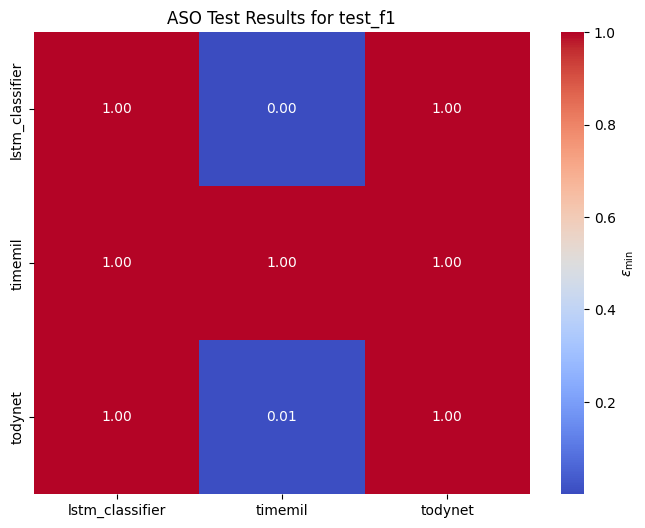

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson
from deepsig import multi_aso

def analyze_model_performance(dataset_df, metric, confidence_level=0.95, bonferroni=True, seed=42):
    """
    Analyze model performance using the ASO test and visualize results.

    Args:
        dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
        metric (str): Performance metric to analyze (e.g., 'test_f1').
        confidence_level (float): Confidence level for the ASO test.
        bonferroni (bool): Whether to apply Bonferroni correction.
        seed (int): Random seed for reproducibility.
    """
    # Step 1: Group scores by model
    grouped = dataset_df.groupby('model')[metric].apply(list).to_dict()

    # Step 2: Check empirical distributions
    print("\n--- Empirical Distribution Analysis ---")
    for model, scores in grouped.items():
        print(f"\nModel: {model}")
        _, p_value = shapiro(scores)
        print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  -> Non-normal distribution detected. Apply non-parametric ASO test.")
        else:
            print("  -> Approximately normal distribution. Apply parametric hypothesis test.")

        # Plot the distribution
        sns.kdeplot(scores, label=model, fill=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.legend(title='Model')
    plt.show()

    # Step 3: Run ASO Test
    print("\n--- ASO Test Results ---")
    scores = {model: np.array(scores) for model, scores in grouped.items()}
    aso_matrix = multi_aso(scores, confidence_level=confidence_level, return_df=True, use_bonferroni=bonferroni, seed=seed)
    print(aso_matrix)

    # Visualize ASO matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(aso_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': r'$\epsilon_\text{min}$'})
    plt.title(f'ASO Test Results for {metric}')
    plt.show()

    return aso_matrix


# Example usage
# Dataset: Assume `dataset_metrics['rotten']` is loaded
aso_results = analyze_model_performance(
    dataset_df=dataset_metrics['rotten'],
    metric='test_f1',  # Change this to any other metric of interest
    confidence_level=0.95,
    bonferroni=True,
    seed=42
)



--- Empirical Distributions ---


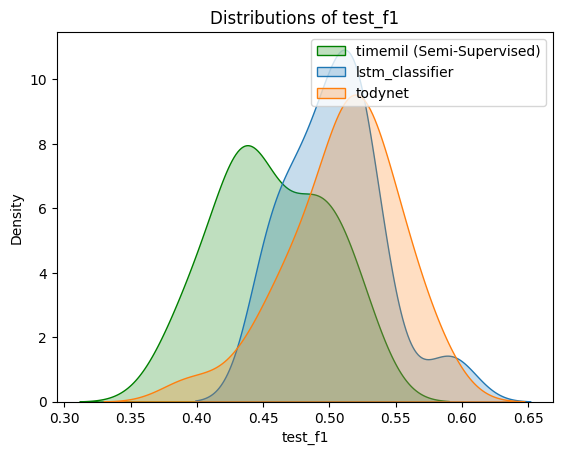

ANOVA Results: F-statistic = 16.1189, p-value = 0.0000
  -> Significant differences detected between models.

Posthoc Tukey HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1      group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
lstm_classifier timemil  -0.0475    0.0 -0.0722 -0.0228   True
lstm_classifier todynet   0.0062 0.8194 -0.0184  0.0309  False
        timemil todynet   0.0537    0.0   0.029  0.0784   True
--------------------------------------------------------------


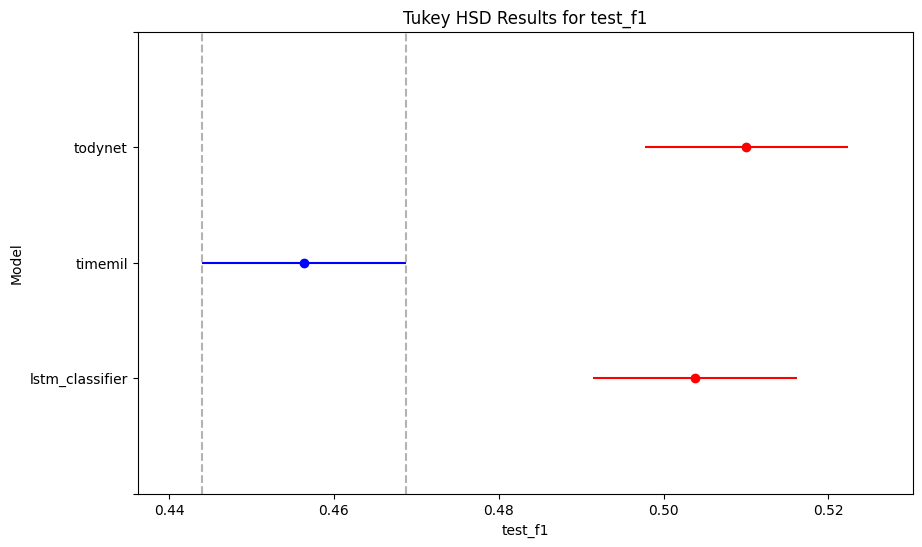


--- Pairwise T-Tests ---
Timemil vs. lstm_classifier: t-statistic = -4.7062, p-value = 0.0000
  -> Significant difference: timemil outperforms lstm_classifier.
Timemil vs. todynet: t-statistic = -4.9436, p-value = 0.0000
  -> Significant difference: timemil outperforms todynet.


In [ ]:
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

def test_semi_supervised_hypothesis(dataset_df, metric, alpha=0.05):
    """
    Test the hypothesis that semi-supervised models outperform supervised models.

    Args:
        dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
        metric (str): Performance metric to analyze (e.g., 'test_f1').
        alpha (float): Significance level for hypothesis testing.
    """
    semi_supervised = dataset_df[dataset_df['model'] == 'timemil'][metric]
    supervised = dataset_df[dataset_df['model'].isin(['lstm_classifier', 'todynet'])]

    # Visualize distributions
    print("\n--- Empirical Distributions ---")
    sns.kdeplot(semi_supervised, label='timemil (Semi-Supervised)', fill=True, color='green')
    for model in ['lstm_classifier', 'todynet']:
        sns.kdeplot(supervised[supervised['model'] == model][metric], label=model, fill=True)
    plt.title(f'Distributions of {metric}')
    plt.xlabel(metric)
    plt.legend()
    plt.show()

    # Perform ANOVA test across all models
    grouped_scores = [dataset_df[dataset_df['model'] == model][metric].values for model in dataset_df['model'].unique()]
    f_stat, p_value_anova = f_oneway(*grouped_scores)
    print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
    if p_value_anova < alpha:
        print("  -> Significant differences detected between models.")

        # Perform Tukey HSD posthoc test
        tukey = pairwise_tukeyhsd(
            endog=dataset_df[metric],  # Dependent variable
            groups=dataset_df['model'],  # Grouping variable
            alpha=alpha
        )
        print("\nPosthoc Tukey HSD Test Results:")
        print(tukey)
        tukey.plot_simultaneous(comparison_name='timemil', xlabel=metric, ylabel='Model')
        plt.title(f'Tukey HSD Results for {metric}')
        plt.show()

    # Directly compare semi-supervised vs. supervised models (T-Test)
    print("\n--- Pairwise T-Tests ---")
    for model in ['lstm_classifier', 'todynet']:
        supervised_scores = supervised[supervised['model'] == model][metric]
        t_stat, p_value_ttest = ttest_ind(semi_supervised, supervised_scores, equal_var=False)
        print(f"Timemil vs. {model}: t-statistic = {t_stat:.4f}, p-value = {p_value_ttest:.4f}")
        if p_value_ttest < alpha:
            print(f"  -> Significant difference: timemil outperforms {model}.")
        else:
            print(f"  -> No significant difference between timemil and {model}.")

# Example usage
test_semi_supervised_hypothesis(dataset_metrics['rotten'], metric='test_f1', alpha=0.05)



--- Empirical Distributions ---


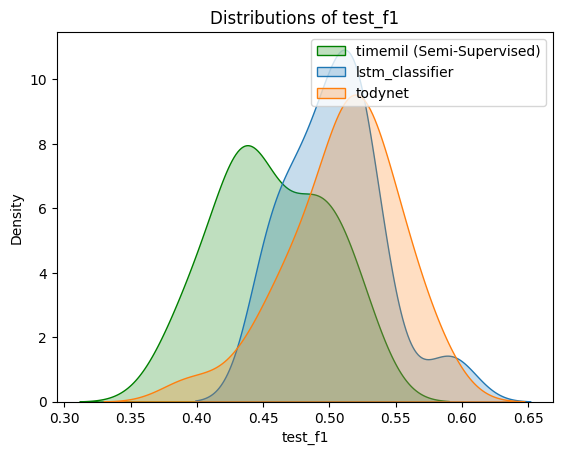

ANOVA Results: F-statistic = 16.1189, p-value = 0.0000
  -> Significant differences detected between models.

Posthoc Tukey HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1      group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
lstm_classifier timemil  -0.0475    0.0 -0.0722 -0.0228   True
lstm_classifier todynet   0.0062 0.8194 -0.0184  0.0309  False
        timemil todynet   0.0537    0.0   0.029  0.0784   True
--------------------------------------------------------------


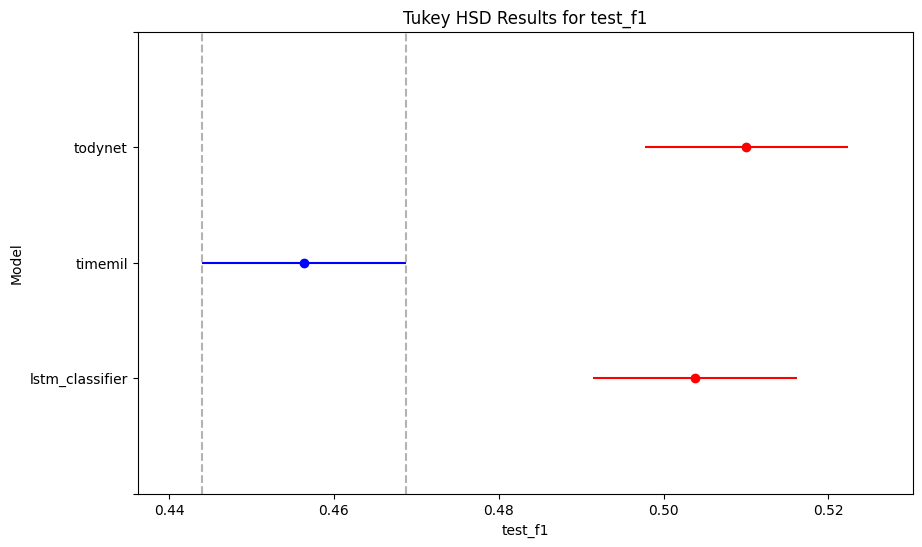


--- Pairwise T-Tests ---
Timemil vs. lstm_classifier: t-statistic = -4.7062, p-value = 0.0000, mean difference = -0.0475
  -> Significant difference: timemil underperforms lstm_classifier.
Timemil vs. todynet: t-statistic = -4.9436, p-value = 0.0000, mean difference = -0.0537
  -> Significant difference: timemil underperforms todynet.


In [ ]:
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

def test_semi_supervised_hypothesis(dataset_df, metric, alpha=0.05):
    """
    Test the hypothesis that semi-supervised models outperform supervised models.

    Args:
        dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
        metric (str): Performance metric to analyze (e.g., 'test_f1').
        alpha (float): Significance level for hypothesis testing.
    """
    semi_supervised = dataset_df[dataset_df['model'] == 'timemil'][metric]
    supervised = dataset_df[dataset_df['model'].isin(['lstm_classifier', 'todynet'])]

    # Visualize distributions
    print("\n--- Empirical Distributions ---")
    sns.kdeplot(semi_supervised, label='timemil (Semi-Supervised)', fill=True, color='green')
    for model in ['lstm_classifier', 'todynet']:
        sns.kdeplot(supervised[supervised['model'] == model][metric], label=model, fill=True)
    plt.title(f'Distributions of {metric}')
    plt.xlabel(metric)
    plt.legend()
    plt.show()

    # Perform ANOVA test across all models
    grouped_scores = [dataset_df[dataset_df['model'] == model][metric].values for model in dataset_df['model'].unique()]
    f_stat, p_value_anova = f_oneway(*grouped_scores)
    print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
    if p_value_anova < alpha:
        print("  -> Significant differences detected between models.")

        # Perform Tukey HSD posthoc test
        tukey = pairwise_tukeyhsd(
            endog=dataset_df[metric],  # Dependent variable
            groups=dataset_df['model'],  # Grouping variable
            alpha=alpha
        )
        print("\nPosthoc Tukey HSD Test Results:")
        print(tukey)
        tukey.plot_simultaneous(comparison_name='timemil', xlabel=metric, ylabel='Model')
        plt.title(f'Tukey HSD Results for {metric}')
        plt.show()

    # Directly compare semi-supervised vs. supervised models (T-Test)
    print("\n--- Pairwise T-Tests ---")
    for model in ['lstm_classifier', 'todynet']:
        supervised_scores = supervised[supervised['model'] == model][metric]
        t_stat, p_value_ttest = ttest_ind(semi_supervised, supervised_scores, equal_var=False)
        mean_difference = semi_supervised.mean() - supervised_scores.mean()
        print(f"Timemil vs. {model}: t-statistic = {t_stat:.4f}, p-value = {p_value_ttest:.4f}, mean difference = {mean_difference:.4f}")
        if p_value_ttest < alpha:
            if mean_difference > 0:
                print(f"  -> Significant difference: timemil outperforms {model}.")
            else:
                print(f"  -> Significant difference: timemil underperforms {model}.")
        else:
            print(f"  -> No significant difference between timemil and {model}.")

test_semi_supervised_hypothesis(dataset_metrics['rotten'], metric='test_f1', alpha=0.05)


In [ ]:
dataset_metrics['rotten'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   test_loss       90 non-null     float64
 1   test_acc        90 non-null     float64
 2   test_f1         90 non-null     float64
 3   test_precision  90 non-null     float64
 4   test_recall     90 non-null     float64
 5   test_auc        90 non-null     float64
 6   model           90 non-null     object 
 7   dataset         90 non-null     object 
 8   run             90 non-null     int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 6.5+ KB


# Performance Assessment V2

## 1. Load and Prepare the Data
First, import necessary libraries and load your data into a pandas DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your DataFrame is already loaded as 'df'
# If not, load it using:
# df = pd.read_csv('your_data.csv')

# colorize print as bold green or bold red
BOLD = '\033[1m'
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
BOLD_GREEN = BOLD + GREEN
BOLD_RED = BOLD + RED
BOLD_RESET = BOLD + RESET

# Display the first few rows
#df = dataset_metrics['rotten']
#print(df.head())

## 2. Descriptive Statistics + Check for normality for metric distributions across models
### Statistics
    Compute the mean and standard deviation of the F1 score and AUC for each model. KDE Plot & Box Plot for Distributions.

### Check for Normality
Use the Shapiro-Wilk test to check if the data is normally distributed.

    Interpretation:

    p > 0.05: Data is normally distributed.

    p ≤ 0.05: Data is not normally distributed.


### Test for Equal Variances
Use Levene’s Test to check for homogeneity of variances.

    Interpretation:

    p > 0.05: Variances are equal.

    p ≤ 0.05: Variances are not equal.


--- rotten | avg_infidelity_ig ---
             model      mean       std
0  lstm_classifier  0.000781  0.000172
1          timemil  0.003376  0.001664
2          todynet  0.000529  0.000343


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.7725
p-value: 0.7725 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.0055
p-value: 0.0055 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.0239
p-value: 0.0239 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-16-8c17266f438f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


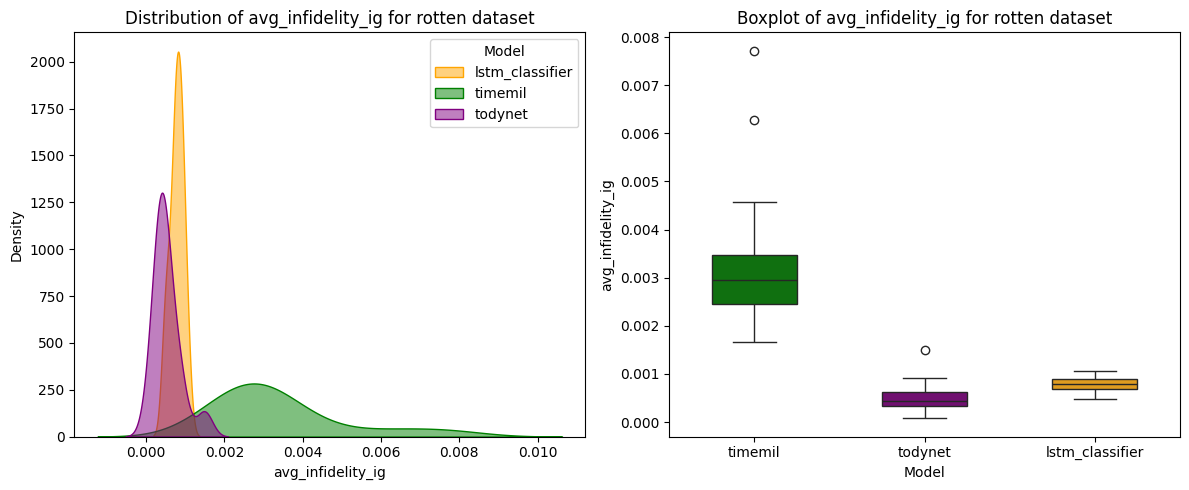


--- rotten | avg_infidelity_dl ---
             model      mean       std
0  lstm_classifier  0.000741  0.000141
1          timemil  0.003767  0.001829
2          todynet  0.000514  0.000358


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.1962
p-value: 0.1962 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.0011
p-value: 0.0011 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.0077
p-value: 0.0077 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-16-8c17266f438f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


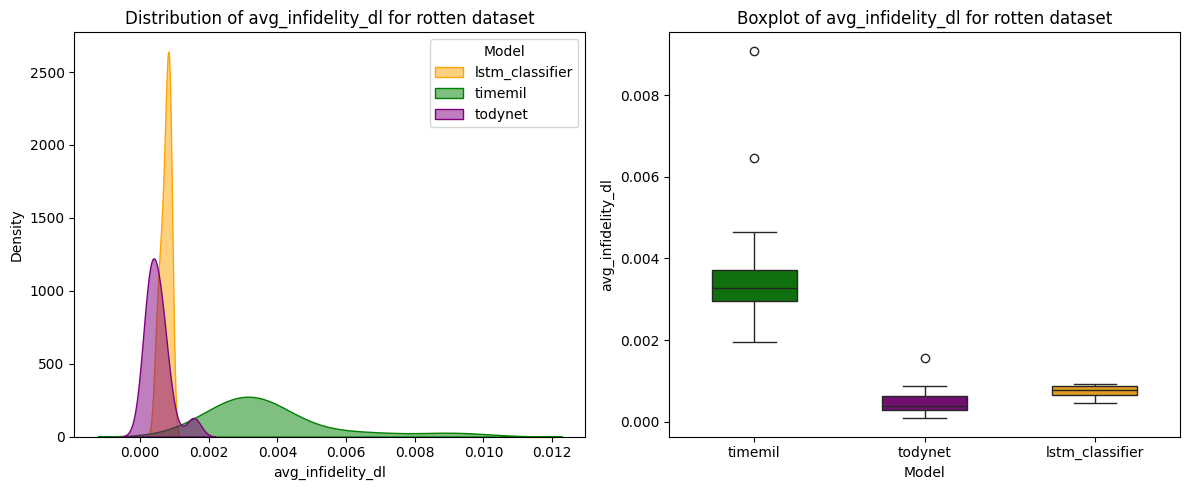


timemil_f1 vs lstm_f1, 0.0125
timemil_f1 vs lstm_f1 | Variances are not equal

timemil_f1 vs todynet_f1, 0.0247
timemil_f1 vs todynet_f1 | Variances are not equal

timemil_auc vs lstm_auc, 0.0275
timemil_auc vs lstm_auc | Variances are not equal

timemil_auc vs todynet_auc, 0.0590
timemil_auc vs todynet_auc | Variances are equal

todynet_f1 vs lstm_f1, 0.2494
todynet_f1 vs lstm_f1 | Variances are equal

todynet_auc vs lstm_auc, 0.0993
todynet_auc vs lstm_auc | Variances are equal


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

def compute_stats(df, dataset_name, metric):
    # Group the data by model
    grouped = df.groupby('model')

    # Calculate mean and std for the specified metric
    stats_df = grouped[metric].agg(['mean', 'std']).reset_index()

    # Print the results
    print(f"\n--- {dataset_name} | {metric} ---")
    print(stats_df)
    print("\n")

# Plot the distribution
def plot_distribution(df, data_name, metric_1_name, metric_2_name):
    metrics = [metric_1_name, metric_2_name]

    for metric in metrics:
        # Define colors for each model
        model_colors = {
            'timemil': 'green',
            'todynet': 'purple',
            'lstm_classifier': 'orange'
        }

        # Create a color palette for the models
        palette = {model: color for model, color in model_colors.items()}

        # Compute the stats
        compute_stats(df, data_name, metric)

        # Group scores by model
        grouped = df.groupby('model')[metric].apply(list).to_dict()

        # Empirical Distribution Analysis
        print("--- Empirical Distribution Analysis ---")
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        for model, scores in grouped.items():
            print(f"\nModel: {model}")
            _, p_value = shapiro(scores)
            print(f"Shapiro-Wilk Test p-value for model {model}: {p_value:.4f}")
            if p_value <= 0.05:
                print(f"p-value: {p_value:.4f} <= alpha 0.05 {BOLD_RED}-> Non-normal distribution detected. Apply non-parametric test.{BOLD_RESET}")
            else:
                print(f"p-value: {p_value:.4f} > alpha 0.05 {BOLD_GREEN}-> Approximately normal distribution. Apply parametric hypothesis test.{BOLD_RESET}")

            # Plot the distribution
            sns.kdeplot(
                scores, label=model, ax=ax[0], color=palette[model], fill=True, alpha=0.5
            )

        ax[0].set_title(f'Distribution of {metric} for {data_name} dataset')
        ax[0].set_xlabel(metric)
        ax[0].set_ylabel('Density')
        ax[0].legend(title='Model')

        # Plot boxplot
        sns.boxplot(
            data=df,
            x='model',
            y=metric,
            palette=palette,
            width=0.5,
            ax=ax[1]
        )
        ax[1].set_title(f'Boxplot of {metric} for {data_name} dataset')
        ax[1].set_xlabel('Model')
        ax[1].set_ylabel(metric)
        #ax[1].legend(title='Model')

        plt.tight_layout()
        plt.show()

        # plt.title(f'Distribution of {metric} for {data_name}')
        # plt.xlabel(metric)
        # plt.legend(title='Model')
        # plt.show()

    # creating the kdeplots
    # fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    # ax[0] = sns.kdeplot(df[metric_1_name], label=model, fill=True, ax=ax[0], palette=palette)
    # ax[1] = sns.kdeplot(df[metric_2_name], label=model, fill=True, ax=ax[1], palette=palette)
    # ax[0].set_title(f'Distribution of {metric_1_name}')
    # ax[1].set_title(f'Distribution of {metric_2_name}')
    # ax[0].set_xlabel(metric_1_name)
    # ax[1].set_xlabel(metric_2_name)
    # plt.legend(title='Model')
    # plt.show()
    # plt.close()

# extracting summary statistics for F1 and AURO
dataset = "rotten"
# dataset = "imdb"
# dataset = "twitter"


plot_distribution(dataset_metrics[dataset], dataset, "avg_infidelity_ig", "avg_infidelity_dl")
df = dataset_metrics[dataset]


from scipy.stats import levene

# Separate F1 scores and AUCs for each model
timemil_f1 = df[df['model'] == 'timemil']['avg_infidelity_ig']
lstm_f1 = df[df['model'] == 'lstm_classifier']['avg_infidelity_ig']
todynet_f1 = df[df['model'] == 'todynet']['avg_infidelity_ig']
timemil_auc = df[df['model'] == 'timemil']['avg_infidelity_dl']
lstm_auc = df[df['model'] == 'lstm_classifier']['avg_infidelity_dl']
todynet_auc = df[df['model'] == 'todynet']['avg_infidelity_dl']


# Levene's test for equal variances
results ={
    'timemil_f1 vs lstm_f1': levene(timemil_f1, lstm_f1),
    'timemil_f1 vs todynet_f1': levene(timemil_f1, todynet_f1),
    'timemil_auc vs lstm_auc': levene(timemil_auc, lstm_auc),
    'timemil_auc vs todynet_auc': levene(timemil_auc, todynet_auc),
    'todynet_f1 vs lstm_f1': levene(todynet_f1, lstm_f1),
    'todynet_auc vs lstm_auc': levene(todynet_auc, lstm_auc)
}



for name, result in results.items():
    stat, p_value = _, p_value = result
    print(f"\n{name}, {p_value:.4f}")
    if result.pvalue > 0.05:
        print(f"{BOLD_GREEN}{name} | Variances are equal{BOLD_RESET}")
    else:
        print(f"{BOLD_RED}{name} | Variances are not equal{BOLD_RESET}")


### Conclusion Statistical assessment to conduct pairwise hypothesis tests

##### Normality Test Results
F1:
TimeMIL: normal distribution ->
TodyNet: normal distribution ->
LSTM

AUROC:
TimeMIL
TodyNet
LSTM


##### F1 Score:
1. TimeMIL vs. TodyNet
Rotten

IMDB

Twitter

2. TimeMIL vs. LSTM
Rotten:
IMDB:
Twitter:

3. TodyNet vs. LSTM
Rotten:
IMDB:
Twitter:

##### AUROC Score:
1. TimeMIL vs. TodyNet_ Test

2. TimeMIL vs. LSTM

3. TodyNet vs. LSTM

## 3.3. Choose Appropriate Statistical Test
If data is normally distributed and variances are equal, use the Independent t-test.

If data is not normally distributed or variances are unequal, use the Mann-Whitney U test.

## 3.4. Perform Statistical Tests

Null Hypothesis: There is a significant difference between the model performances.

Counter Hypothesis: There is no significant difference between the model performances.

    Interpretation:

    p ≤ 0.05: Statistically significant difference between models.

    p > 0.05: No statistically significant difference between models

Option 1: Independent t-test

In [ ]:
# Independent t-test

t_test_f1 = stats.ttest_ind(timemil_f1, lstm_f1, equal_var=True)
t_test_auc = stats.ttest_ind(timemil_auc, lstm_auc, equal_var=True)

print('t-test for F1:', t_test_f1)
print('t-test for AUC:', t_test_auc)

t-test for F1: TtestResult(statistic=6.0075701774343475, pvalue=1.7931740520401758e-06, df=28.0)
t-test for AUC: TtestResult(statistic=6.385946370754206, pvalue=6.519980840216148e-07, df=28.0)


Option 2: Mann-Whitney U test

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_test_f1 = mannwhitneyu(timemil_f1, lstm_f1, alternative='two-sided')
u_test_auc = mannwhitneyu(timemil_auc, lstm_auc, alternative='two-sided')

print('Mann-Whitney U test for F1:', u_test_f1)
print('Mann-Whitney U test for AUC:', u_test_auc)

Mann-Whitney U test for F1: MannwhitneyuResult(statistic=182.0, pvalue=7.657027517674022e-05)
Mann-Whitney U test for AUC: MannwhitneyuResult(statistic=126.0, pvalue=1.7290312624849194e-06)


# Hypothesis testing for each metric, dataset and model pairs

###### Methods

In [ ]:
# from scipy.stats import ttest_rel
# from scipy.stats import ttest_ind
# from scipy.stats import wilcoxon

# def paired_t_test(data1, data2, alpha=0.05):
#     """
#     Perform a paired t-test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     t_stat, p_value = ttest_rel(data1, data2)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result



# def wilcoxon_test(data1, data2, alpha=0.05):
#     """
#     Perform a Wilcoxon signed-rank test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     stat, p_value = wilcoxon(data1, data2)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result



# def welchs_t_test(data1, data2, alpha=0.05):
#     """
#     Perform a Welch's t-test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result


In [ ]:
def hypothesis_test(data1, data2, test_type, model_a, model_b, alpha=0.05, direction=None):
    """
    Perform hypothesis testing based on the chosen test type and observed averages.

    Parameters:
        data1 (list or array): First dataset (e.g., F1 scores for Model A).
        data2 (list or array): Second dataset (e.g., F1 scores for Model B).
        test_type (str): Type of test to perform ('paired_t', 'wilcoxon', 'welchs_t').
        alpha (float): Significance level (default is 0.05).
        direction (str): Direction of alternative hypothesis ('greater', 'less', or None).

    Returns:
        test_statistic (float): Test statistic value.
        p_value (float): p-value of the test.
        result (str): 'Significant' or 'Not Significant' based on alpha.
        conclusion (str): Null hypothesis rejection or retention.
    """
    if test_type == 'paired_t':
        from scipy.stats import ttest_rel
        t_stat, p_value = ttest_rel(data1, data2)
    elif test_type == 'wilcoxon':
        from scipy.stats import wilcoxon
        t_stat, p_value = wilcoxon(data1, data2, alternative=direction)
    elif test_type == 'welchs_t':
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    else:
        raise ValueError("Invalid test_type. Choose 'paired_t', 'wilcoxon', or 'welchs_t'.")

    # Determine result
    result = "Significant" if p_value < alpha else "Not Significant"

    # Formulate conclusion
    if result == "Significant":
        conclusion = f"Reject the null hypothesis. Model {model_a if direction == 'greater' else model_b} significantly outperforms."
    else:
        conclusion = "Fail to reject the null hypothesis. No significant difference."

    return t_stat, p_value, result, conclusion


Select the Test Based on Data Properties:

Rotten Tomatoes, F1 Score, TimeMIL vs. LSTM: Paired
𝑡
t-test (dependent, normal).

IMDB, F1 Score, TimeMIL vs. TodyNet: Wilcoxon signed-rank test (dependent, non-normal).

Twitter, AUROC, TimeMIL vs. LSTM: Welch’s
𝑡
t-test (independent, unequal variances).


In [ ]:
"avg_infidelity_ig", "avg_infidelity_dl"

##### TimeMIL vs LSTM

###### Rotten F1

In [ ]:

model_a = "timemil"
model_b = "lstm_classifier"
dataset = "rotten"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'greater'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on rotten dataset for the metric avg_infidelity_ig:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 3.0517578125e-05
Result: Significant
Conclusion: Reject the null hypothesis. Model timemil significantly outperforms.


###### Rotten AUROC

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "rotten"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on rotten dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### IMDB F1

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "imdb"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### IMDB AUROC

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "imdb"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Twitter F1

In [ ]:

model_a = "timemil"
model_b = "lstm_classifier"
dataset = "twitter"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Twitter AUROC

In [ ]:

model_a = "timemil"
model_b = "lstm_classifier"
dataset = "twitter"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


##### TimeMIL vs TodyNet

###### Rotten F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "rotten"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on rotten dataset for the metric avg_infidelity_ig:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Rotten AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "rotten"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on rotten dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### IMDB F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "imdb"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### IMDB AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "imdb"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Twitter F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "twitter"
metric = 'avg_infidelity_ig'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Twitter AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "twitter"
metric = 'avg_infidelity_dl'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


#### Adjusted P-values


In [ ]:
import numpy as np

def bonferroni_correction(p_values, alpha=0.05):
    """
    Apply Bonferroni correction to a list of p-values.
    """
    adjusted_p_values = np.minimum(np.array(p_values) * len(p_values), 1)
    significant = adjusted_p_values < alpha
    return adjusted_p_values, significant

def benjamini_hochberg(p_values, alpha=0.05):
    """
    Apply Benjamini-Hochberg procedure to a list of p-values.
    """
    p_values = np.array(p_values)
    n = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_p_values = p_values[sorted_indices]
    adjusted_p_values = np.zeros(n)

    for i, p in enumerate(sorted_p_values):
        adjusted_p_values[sorted_indices[i]] = p * n / (i + 1)

    adjusted_p_values = np.minimum.accumulate(adjusted_p_values[::-1])[::-1]
    significant = adjusted_p_values < alpha
    return adjusted_p_values, significant


In [ ]:
p_values = [
    0.0000842156770120848,
    0.0000219118943318197,
    0.0000134427100419998,
    9.31322574615478e-10,
    3.8663285618011e-15,
    2.02063437946098e-08,
    2.09854733213837e-15,
    9.31322574615478e-10,
    1.2759119272232e-07,
    0.310903297893551,
    0.00155718861103789,
    0.985329676768029
]

In [ ]:
p_values

[8.42156770120848e-05,
 2.19118943318197e-05,
 1.34427100419998e-05,
 9.31322574615478e-10,
 3.8663285618011e-15,
 2.02063437946098e-08,
 2.09854733213837e-15,
 9.31322574615478e-10,
 1.2759119272232e-07,
 0.310903297893551,
 0.00155718861103789,
 0.985329676768029]

In [ ]:

# Example p-values
# p_values = [0.01, 0.04, 0.02, 0.05, 0.03, 0.07, 0.06, 0.01, 0.02, 0.08, 0.09, 0.04, 0.05]

# Bonferroni Correction
bonf_adjusted, bonf_significant = bonferroni_correction(p_values)
print("Bonferroni Adjusted p-values:", bonf_adjusted)
print("Significant Results (Bonferroni):", bonf_significant)

# Benjamini-Hochberg Procedure
bh_adjusted, bh_significant = benjamini_hochberg(p_values)
print("Benjamini-Hochberg Adjusted p-values:", bh_adjusted)
print("Significant Results (Benjamini-Hochberg):", bh_significant)

Bonferroni Adjusted p-values: [1.01058812e-03 2.62942732e-04 1.61312521e-04 1.11758709e-08
 4.63959427e-14 2.42476126e-07 2.51825680e-14 1.11758709e-08
 1.53109431e-06 1.00000000e+00 1.86862633e-02 1.00000000e+00]
Significant Results (Bonferroni): [ True  True  True  True  True  True  True  True  True False  True False]
Benjamini-Hochberg Adjusted p-values: [2.31979714e-14 2.31979714e-14 2.31979714e-14 2.31979714e-14
 2.31979714e-14 2.51825680e-14 2.51825680e-14 2.79396772e-09
 2.55182385e-07 1.86862633e-03 1.86862633e-03 9.85329677e-01]
Significant Results (Benjamini-Hochberg): [ True  True  True  True  True  True  True  True  True  True  True False]


# Statistical Assessment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your DataFrame is already loaded as 'df'
# If not, load it using:
# df = pd.read_csv('your_data.csv')

# colorize print as bold green or bold red
BOLD = '\033[1m'
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
BOLD_GREEN = BOLD + GREEN
BOLD_RED = BOLD + RED
BOLD_RESET = BOLD + RESET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

def compute_stats(df, dataset_name, metric):
    # Group the data by model
    grouped = df.groupby('model')

    # Calculate mean and std for the specified metric
    stats_df = grouped[metric].agg(['mean', 'std']).reset_index()

    # Print the results
    print(f"\n--- {dataset_name} | {metric} ---")
    print(stats_df)
    print("\n")

# Plot the distribution
def plot_distribution(df, data_name, metric_1_name, metric_2_name):
    metrics = [metric_1_name, metric_2_name]

    for metric in metrics:
        # Define colors for each model
        model_colors = {
            'timemil': 'green',
            'todynet': 'purple',
            'lstm_classifier': 'orange'
        }

        # Create a color palette for the models
        palette = {model: color for model, color in model_colors.items()}

        # Compute the stats
        compute_stats(df, data_name, metric)

        # Group scores by model
        grouped = df.groupby('model')[metric].apply(list).to_dict()

        # Empirical Distribution Analysis
        print("--- Empirical Distribution Analysis ---")
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        for model, scores in grouped.items():
            print(f"\nModel: {model}")
            stat, p_value = shapiro(scores)
            print(f"Shapiro-Wilk Test p-value for model {model}: {p_value:.6f}")
            print(f"Shapiro-Wilk Test stat for model {model}: {stat:.6f}")
            if p_value <= 0.05:
                print(f"p-value: {p_value:.4f} <= alpha 0.05 {BOLD_RED}-> Non-normal distribution detected. Apply non-parametric test.{BOLD_RESET}")
            else:
                print(f"p-value: {p_value:.4f} > alpha 0.05 {BOLD_GREEN}-> Approximately normal distribution. Apply parametric hypothesis test.{BOLD_RESET}")

            # Plot the distribution
            sns.kdeplot(
                scores, label=model, ax=ax[0], color=palette[model], fill=True, alpha=0.5
            )

        ax[0].set_title(f'Distribution of {metric} for {data_name} dataset')
        ax[0].set_xlabel(metric)
        ax[0].set_ylabel('Density')
        ax[0].legend(title='Model')

        # Plot boxplot
        sns.boxplot(
            data=df,
            x='model',
            y=metric,
            palette=palette,
            width=0.5,
            ax=ax[1]
        )
        ax[1].set_title(f'Boxplot of {metric} for {data_name} dataset')
        ax[1].set_xlabel('Model')
        ax[1].set_ylabel(metric)
        #ax[1].legend(title='Model')

        plt.tight_layout()
        plt.show()

        # plt.title(f'Distribution of {metric} for {data_name}')
        # plt.xlabel(metric)
        # plt.legend(title='Model')
        # plt.show()

    # creating the kdeplots
    # fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    # ax[0] = sns.kdeplot(df[metric_1_name], label=model, fill=True, ax=ax[0], palette=palette)
    # ax[1] = sns.kdeplot(df[metric_2_name], label=model, fill=True, ax=ax[1], palette=palette)
    # ax[0].set_title(f'Distribution of {metric_1_name}')
    # ax[1].set_title(f'Distribution of {metric_2_name}')
    # ax[0].set_xlabel(metric_1_name)
    # ax[1].set_xlabel(metric_2_name)
    # plt.legend(title='Model')
    # plt.show()
    # plt.close()

# extracting summary statistics for F1 and AUROC
# plot_distribution(dataset_metrics["rotten"], "rotten", "test_f1", "test_auc")
# plot_distribution(dataset_metrics["imdb"], "imdb", "test_f1", "test_auc")
# plot_distribution(dataset_metrics["twitter"], "twitter", "test_f1", "test_auc")
# avg_infidelity_ig
# extracting summary statistics for F1 and AURO
# dataset = "rotten"
# dataset = "imdb"



Rotten


--- rotten | avg_infidelity_ig ---
             model      mean       std
0  lstm_classifier  0.000781  0.000172
1          timemil  0.003376  0.001664
2          todynet  0.000529  0.000343


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.772548
Shapiro-Wilk Test stat for model lstm_classifier: 0.964653
p-value: 0.7725 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.005526
Shapiro-Wilk Test stat for model timemil: 0.813612
p-value: 0.0055 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.023902
Shapiro-Wilk Test stat for model todynet: 0.859711
p-value: 0.0239 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


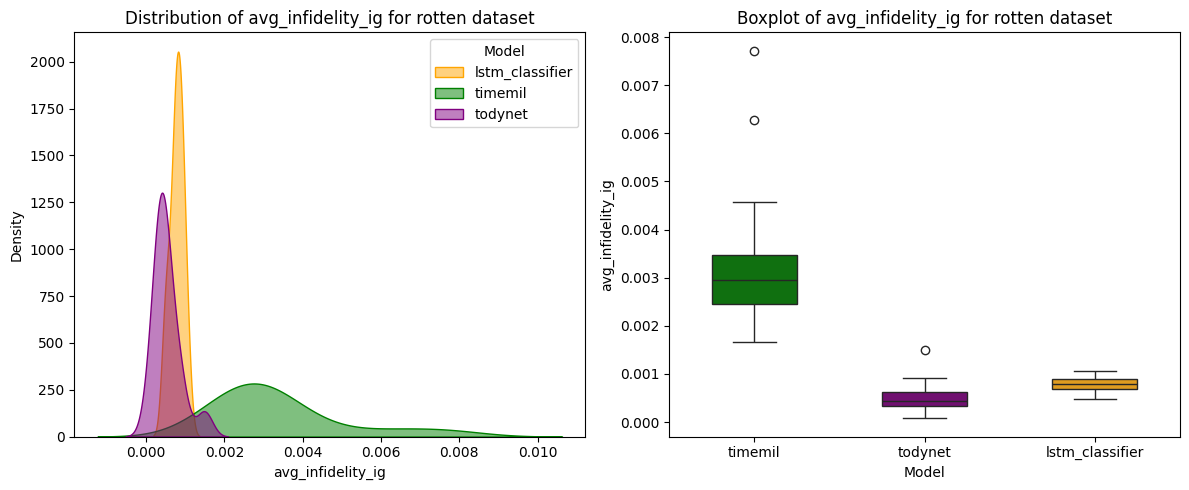


--- rotten | avg_infidelity_dl ---
             model      mean       std
0  lstm_classifier  0.000741  0.000141
1          timemil  0.003767  0.001829
2          todynet  0.000514  0.000358


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.196236
Shapiro-Wilk Test stat for model lstm_classifier: 0.920528
p-value: 0.1962 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.001110
Shapiro-Wilk Test stat for model timemil: 0.757786
p-value: 0.0011 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.007669
Shapiro-Wilk Test stat for model todynet: 0.824293
p-value: 0.0077 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


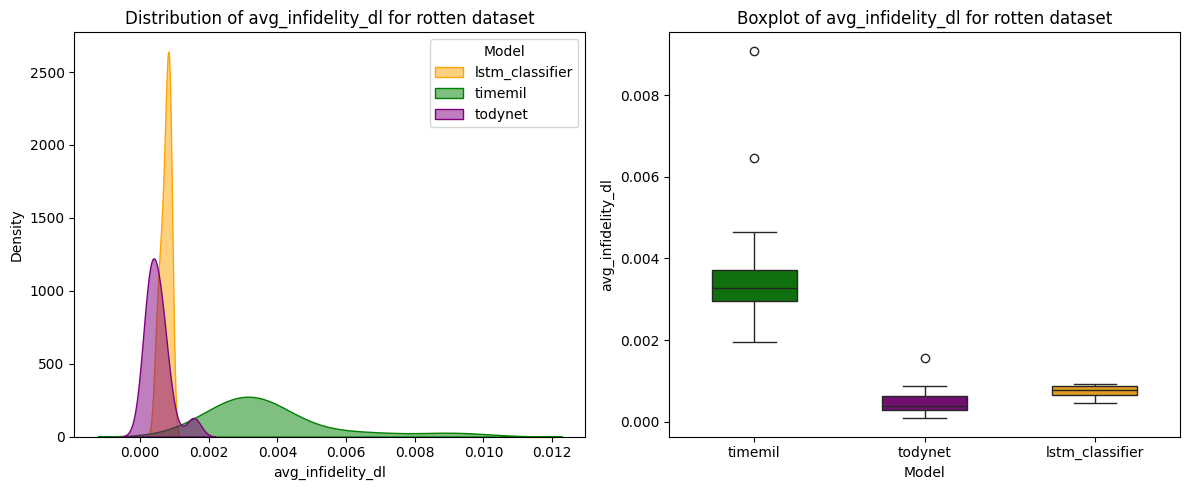


timemil_ig vs lstm_ig, p-value = 0.012513

timemil_ig vs lstm_ig, stat = 7.123761
timemil_ig vs lstm_ig | Variances are not equal

timemil_ig vs todynet_ig, p-value = 0.024730

timemil_ig vs todynet_ig, stat = 5.632526
timemil_ig vs todynet_ig | Variances are not equal

timemil_dl vs lstm_dl, p-value = 0.027537

timemil_dl vs lstm_dl, stat = 5.406134
timemil_dl vs lstm_dl | Variances are not equal

timemil_dl vs todynet_dl, p-value = 0.059010

timemil_dl vs todynet_dl, stat = 3.874110
timemil_dl vs todynet_dl | Variances are equal


In [ ]:
dataset = "rotten"
plot_distribution(dataset_metrics[dataset], dataset, "avg_infidelity_ig", "avg_infidelity_dl")
df = dataset_metrics[dataset]

from scipy.stats import levene

# Separate F1 scores and AUCs for each model
timemil_f1 = df[df['model'] == 'timemil']['avg_infidelity_ig']
lstm_f1 = df[df['model'] == 'lstm_classifier']['avg_infidelity_ig']
todynet_f1 = df[df['model'] == 'todynet']['avg_infidelity_ig']
timemil_auc = df[df['model'] == 'timemil']['avg_infidelity_dl']
lstm_auc = df[df['model'] == 'lstm_classifier']['avg_infidelity_dl']
todynet_auc = df[df['model'] == 'todynet']['avg_infidelity_dl']


# Levene's test for equal variances
results ={
    'timemil_ig vs lstm_ig': levene(timemil_f1, lstm_f1),
    'timemil_ig vs todynet_ig': levene(timemil_f1, todynet_f1),
    'timemil_dl vs lstm_dl': levene(timemil_auc, lstm_auc),
    'timemil_dl vs todynet_dl': levene(timemil_auc, todynet_auc),
    #'todynet_f1 vs lstm_f1': levene(todynet_f1, lstm_f1),
    #'todynet_auc vs lstm_auc': levene(todynet_auc, lstm_auc)
}



for name, result in results.items():
    stat, p_value = result
    print(f"\n{name}, p-value = {p_value:.6f}")
    print(f"\n{name}, stat = {stat:.6f}")
    if result.pvalue > 0.05:
        print(f"{BOLD_GREEN}{name} | Variances are equal{BOLD_RESET}")
    else:
        print(f"{BOLD_RED}{name} | Variances are not equal{BOLD_RESET}")

IMDB


--- imdb | avg_infidelity_ig ---
             model      mean       std
0  lstm_classifier  0.001098  0.000155
1          timemil  0.573625  0.481707
2          todynet  0.001446  0.000622


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.996865
Shapiro-Wilk Test stat for model lstm_classifier: 0.987051
p-value: 0.9969 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.008010
Shapiro-Wilk Test stat for model timemil: 0.825696
p-value: 0.0080 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.129766
Shapiro-Wilk Test stat for model todynet: 0.908794
p-value: 0.1298 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


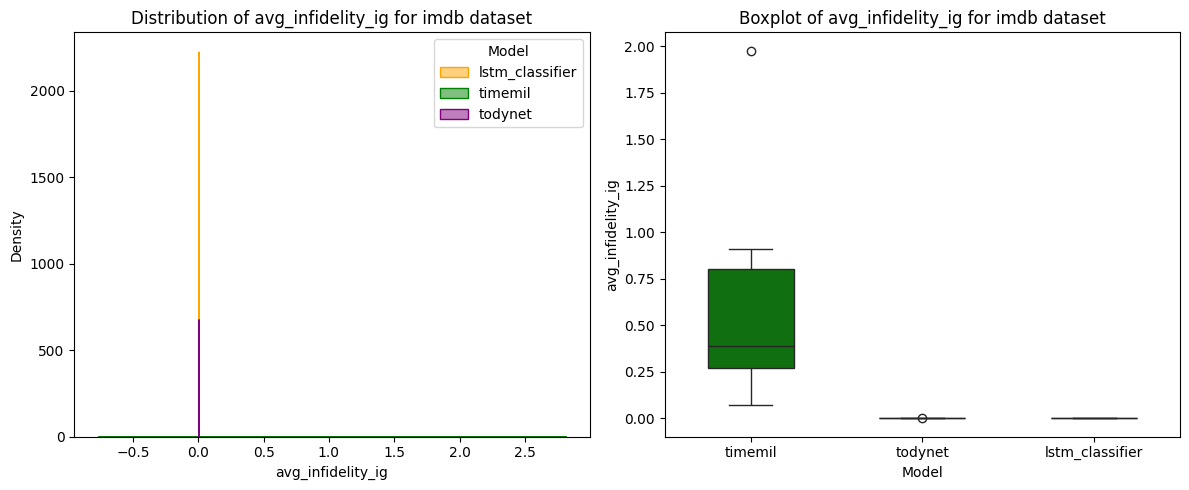


--- imdb | avg_infidelity_dl ---
             model      mean       std
0  lstm_classifier  0.001143  0.000211
1          timemil  0.773938  0.780123
2          todynet  0.001152  0.000632


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.884786
Shapiro-Wilk Test stat for model lstm_classifier: 0.971875
p-value: 0.8848 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.001851
Shapiro-Wilk Test stat for model timemil: 0.776230
p-value: 0.0019 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.006502
Shapiro-Wilk Test stat for model todynet: 0.818941
p-value: 0.0065 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


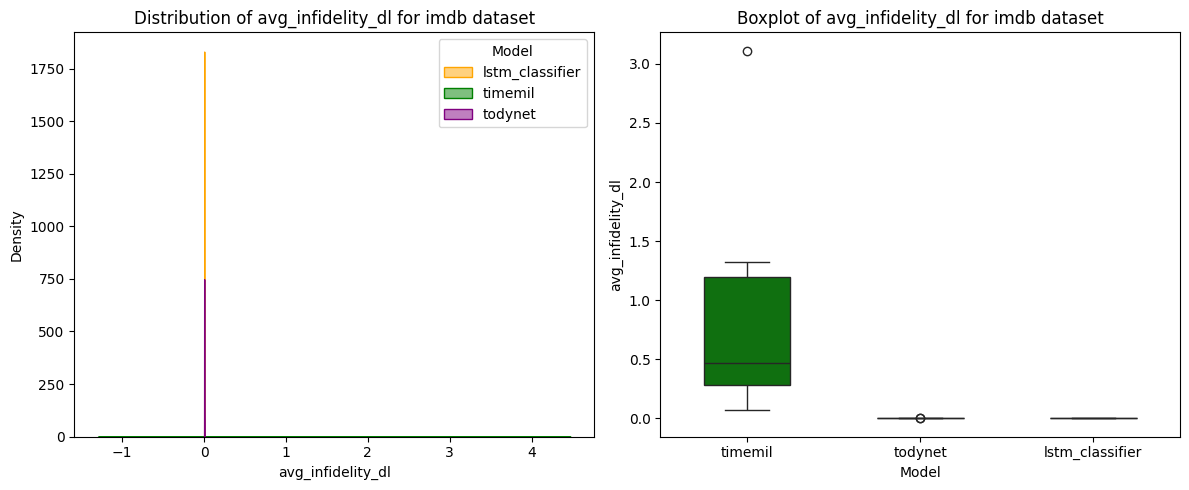


timemil_ig vs lstm_ig, p-value = 0.003012

timemil_ig vs lstm_ig, stat = 10.551925
timemil_ig vs lstm_ig | Variances are not equal

timemil_ig vs todynet_ig, p-value = 0.003036

timemil_ig vs todynet_ig, stat = 10.531770
timemil_ig vs todynet_ig | Variances are not equal

timemil_dl vs lstm_dl, p-value = 0.004654

timemil_dl vs lstm_dl, stat = 9.459974
timemil_dl vs lstm_dl | Variances are not equal

timemil_dl vs todynet_dl, p-value = 0.004672

timemil_dl vs todynet_dl, stat = 9.450661
timemil_dl vs todynet_dl | Variances are not equal


In [ ]:
dataset = "imdb"
plot_distribution(dataset_metrics[dataset], dataset, "avg_infidelity_ig", "avg_infidelity_dl")
df = dataset_metrics[dataset]

from scipy.stats import levene

# Separate F1 scores and AUCs for each model
timemil_f1 = df[df['model'] == 'timemil']['avg_infidelity_ig']
lstm_f1 = df[df['model'] == 'lstm_classifier']['avg_infidelity_ig']
todynet_f1 = df[df['model'] == 'todynet']['avg_infidelity_ig']
timemil_auc = df[df['model'] == 'timemil']['avg_infidelity_dl']
lstm_auc = df[df['model'] == 'lstm_classifier']['avg_infidelity_dl']
todynet_auc = df[df['model'] == 'todynet']['avg_infidelity_dl']


# Levene's test for equal variances
results ={
    'timemil_ig vs lstm_ig': levene(timemil_f1, lstm_f1),
    'timemil_ig vs todynet_ig': levene(timemil_f1, todynet_f1),
    'timemil_dl vs lstm_dl': levene(timemil_auc, lstm_auc),
    'timemil_dl vs todynet_dl': levene(timemil_auc, todynet_auc),
    #'todynet_f1 vs lstm_f1': levene(todynet_f1, lstm_f1),
    #'todynet_auc vs lstm_auc': levene(todynet_auc, lstm_auc)
}



for name, result in results.items():
    stat, p_value = result
    print(f"\n{name}, p-value = {p_value:.6f}")
    print(f"\n{name}, stat = {stat:.6f}")
    if result.pvalue > 0.05:
        print(f"{BOLD_GREEN}{name} | Variances are equal{BOLD_RESET}")
    else:
        print(f"{BOLD_RED}{name} | Variances are not equal{BOLD_RESET}")

Twitter


--- twitter | avg_infidelity_ig ---
             model      mean       std
0  lstm_classifier  0.000384  0.000144
1          timemil  0.022442  0.023491
2          todynet  0.000584  0.000828


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.452692
Shapiro-Wilk Test stat for model lstm_classifier: 0.945231
p-value: 0.4527 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.000095
Shapiro-Wilk Test stat for model timemil: 0.659706
p-value: 0.0001 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.000015
Shapiro-Wilk Test stat for model todynet: 0.575080
p-value: 0.0000 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


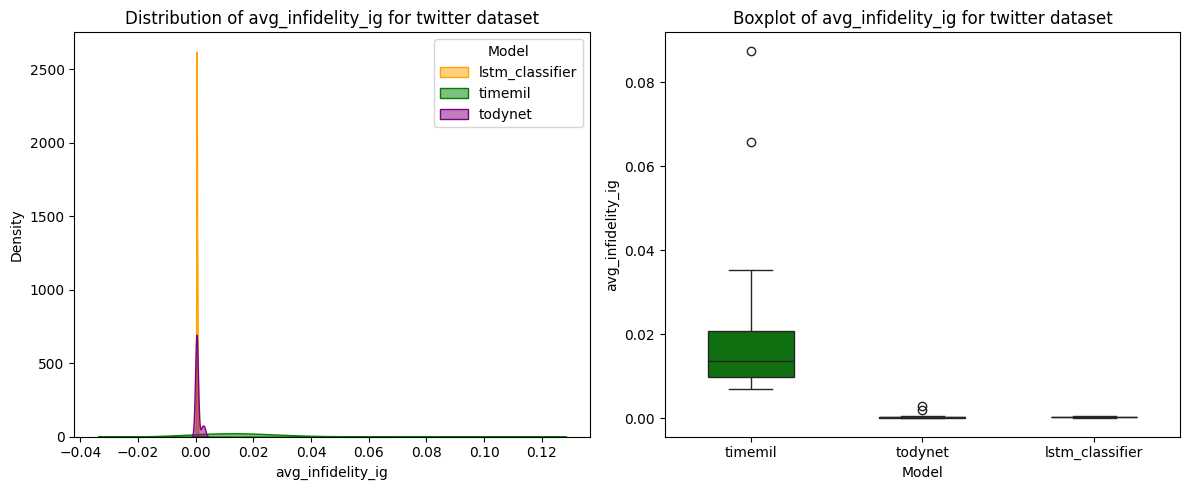


--- twitter | avg_infidelity_dl ---
             model      mean       std
0  lstm_classifier  0.000341  0.000128
1          timemil  0.025024  0.025523
2          todynet  0.000522  0.000847


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.364133
Shapiro-Wilk Test stat for model lstm_classifier: 0.938521
p-value: 0.3641 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.000168
Shapiro-Wilk Test stat for model timemil: 0.683762
p-value: 0.0002 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.000009
Shapiro-Wilk Test stat for model todynet: 0.548823
p-value: 0.0000 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.


<ipython-input-28-3e4dce06cfde>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


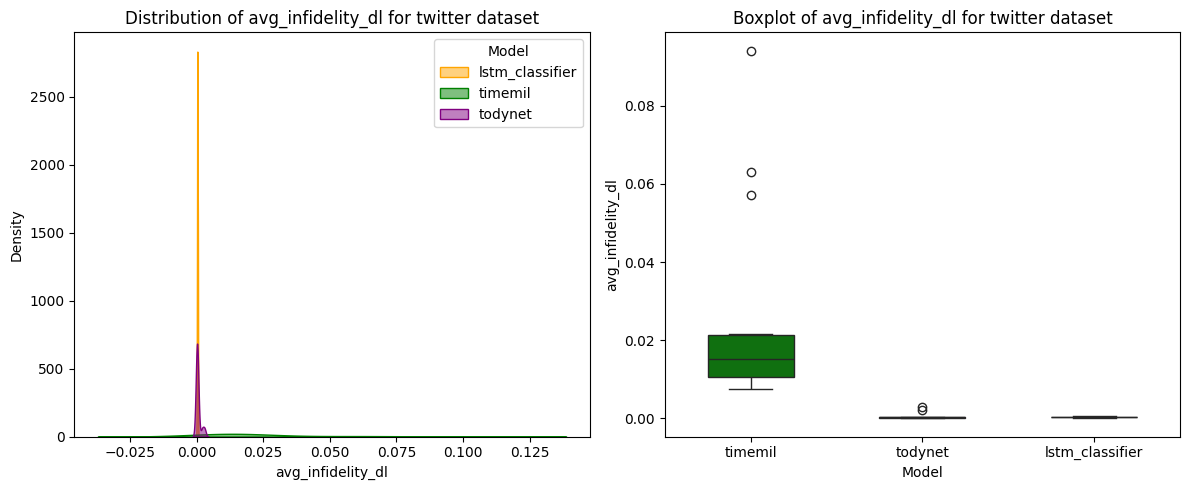


timemil_ig vs lstm_ig, p-value = 0.026958

timemil_ig vs lstm_ig, stat = 5.450707
timemil_ig vs lstm_ig | Variances are not equal

timemil_ig vs todynet_ig, p-value = 0.030357

timemil_ig vs todynet_ig, stat = 5.202989
timemil_ig vs todynet_ig | Variances are not equal

timemil_dl vs lstm_dl, p-value = 0.022305

timemil_dl vs lstm_dl, stat = 5.852154
timemil_dl vs lstm_dl | Variances are not equal

timemil_dl vs todynet_dl, p-value = 0.024957

timemil_dl vs todynet_dl, stat = 5.613210
timemil_dl vs todynet_dl | Variances are not equal


In [ ]:
dataset = "twitter"
plot_distribution(dataset_metrics[dataset], dataset, "avg_infidelity_ig", "avg_infidelity_dl")
df = dataset_metrics[dataset]

from scipy.stats import levene

# Separate F1 scores and AUCs for each model
timemil_f1 = df[df['model'] == 'timemil']['avg_infidelity_ig']
lstm_f1 = df[df['model'] == 'lstm_classifier']['avg_infidelity_ig']
todynet_f1 = df[df['model'] == 'todynet']['avg_infidelity_ig']
timemil_auc = df[df['model'] == 'timemil']['avg_infidelity_dl']
lstm_auc = df[df['model'] == 'lstm_classifier']['avg_infidelity_dl']
todynet_auc = df[df['model'] == 'todynet']['avg_infidelity_dl']


# Levene's test for equal variances
results ={
    'timemil_ig vs lstm_ig': levene(timemil_f1, lstm_f1),
    'timemil_ig vs todynet_ig': levene(timemil_f1, todynet_f1),
    'timemil_dl vs lstm_dl': levene(timemil_auc, lstm_auc),
    'timemil_dl vs todynet_dl': levene(timemil_auc, todynet_auc),
    #'todynet_f1 vs lstm_f1': levene(todynet_f1, lstm_f1),
    #'todynet_auc vs lstm_auc': levene(todynet_auc, lstm_auc)
}



for name, result in results.items():
    stat, p_value = _, p_value = result
    print(f"\n{name}, p-value = {p_value:.6f}")
    print(f"\n{name}, stat = {stat:.6f}")
    if result.pvalue > 0.05:
        print(f"{BOLD_GREEN}{name} | Variances are equal{BOLD_RESET}")
    else:
        print(f"{BOLD_RED}{name} | Variances are not equal{BOLD_RESET}")

# New Hypothesis Testing approach

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

def hypothesis_test(data1, data2, test_type, model_a, model_b, alpha=0.05, direction=None):
    """
    Perform hypothesis testing based on the chosen test type and observed averages.

    Parameters:
        data1 (list or array): First dataset (e.g., F1 scores for Model A).
        data2 (list or array): Second dataset (e.g., F1 scores for Model B).
        test_type (str): Type of test to perform ('paired_t', 'wilcoxon', 'welchs_t').
        alpha (float): Significance level (default is 0.05).
        direction (str): Direction of alternative hypothesis ('greater', 'less', or None).

    Returns:
        test_statistic (float): Test statistic value.
        p_value (float): p-value of the test.
        result (str): 'Significant' or 'Not Significant' based on alpha.
        conclusion (str): Null hypothesis rejection or retention.
    """
    if test_type == 'paired_t':
        from scipy.stats import ttest_rel
        t_stat, p_value = ttest_rel(data1, data2, alternative=direction)
    elif test_type == 'wilcoxon':
        from scipy.stats import wilcoxon
        if direction is None:
            raise ValueError("Wilcoxon test requires a direction ('greater' or 'less').")
        t_stat, p_value = wilcoxon(data1, data2, alternative=direction)
    elif test_type == 'welchs_t':
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    else:
        raise ValueError("Invalid test_type. Choose 'paired_t', 'wilcoxon', or 'welchs_t'.")

    # Determine result
    result = "Significant" if p_value < alpha else "Not Significant"

    # Formulate conclusion
    if result == "Significant":
        if direction == 'greater':
            conclusion = f"Reject the null hypothesis. {model_a} significantly outperforms {model_b}."
        elif direction == 'less':
            conclusion = f"Reject the null hypothesis. {model_b} significantly outperforms {model_a}."
        else:
            conclusion = "Reject the null hypothesis. A significant difference exists between the models."
    else:
        conclusion = "Fail to reject the null hypothesis. No significant difference."

    return t_stat, p_value, result, conclusion


In [ ]:
# Models and dataset details
model_a = "timemil"
model_b = "lstm_classifier" # todynet, lstm_classifier
dataset = "twitter" # rotten twitter imdb
metric = 'avg_infidelity_ig' # "avg_infidelity_ig", "avg_infidelity_dl"

# Test type and direction
test_type = 'wilcoxon'  # 'paired_t', 'wilcoxon', or 'welchs_t'
direction = 'less'  # Based on observed trend: greater or less

# Extract data
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a) & (df["dataset"] == dataset)][metric].values
df_b = df[(df["model"] == model_b) & (df["dataset"] == dataset)][metric].values
# Apply log scaling
epsilon = 1e-6  # Small constant to avoid log(0)
df_a = np.log(df_a + epsilon)
df_b = np.log(df_b + epsilon)
# Perform hypothesis test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type, model_a, model_b, direction=direction)

# Output results
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on twitter dataset for the metric avg_infidelity_ig:
Null Hypothesis: There is no significant difference between the model performances.
Test Statistic: 120.0
p-value: 1.0
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


In [ ]:
check = dataset_metrics["rotten"]
check[check["model"]=="timemil"][['avg_infidelity_ig',"avg_infidelity_dl"]].describe()

,avg_infidelity_ig,avg_infidelity_dl
count,15.000000,15.000000
mean,0.003376,0.003767
std,0.001664,0.001829
min,0.001669,0.001958
25%,0.002449,0.002965
50%,0.002951,0.003287
75%,0.003478,0.003707
max,0.007717,0.009093


In [ ]:
check = dataset_metrics["rotten"]
check[check["model"]=="lstm_classifier"][["model",'avg_infidelity_ig',"avg_infidelity_dl"]]

,model,avg_infidelity_ig,avg_infidelity_dl
30,lstm_classifier,0.000756,0.000684
31,lstm_classifier,0.000888,0.000857
32,lstm_classifier,0.000490,0.000458
33,lstm_classifier,0.000888,0.000885
34,lstm_classifier,0.000945,0.000872
35,lstm_classifier,0.000663,0.000713
36,lstm_classifier,0.000885,0.000809
37,lstm_classifier,0.000724,0.000583
38,lstm_classifier,0.001069,0.000910
39,lstm_classifier,0.000984,0.000866


Bootstrapping approach

In [ ]:
import numpy as np
import pandas as pd

def bootstrap_analysis(data, datasets, metrics, models, n_resamples=1000, alpha=0.05, seed=1234):
    """
    Perform bootstrap hypothesis testing across datasets, metrics, and model pairs.

    Parameters:
        data (dict): Dictionary containing data for each dataset.
        datasets (list): List of dataset names to include in the analysis.
        metrics (list): List of metrics to analyze.
        models (list): List of model names to compare.
        n_resamples (int): Number of bootstrap resamples (default: 1000).
        alpha (float): Significance level for confidence intervals (default: 0.05).
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Results of the bootstrap hypothesis tests.
    """
    np.random.seed(seed)
    results = []

    for dataset in datasets:
        dataset_data = data[dataset]
        for metric in metrics:
            for i, model_a in enumerate(models):
                for model_b in models[i + 1:]:
                    # Filter data for the models
                    scores_a = dataset_data[dataset_data["model"] == model_a][metric].values
                    scores_b = dataset_data[dataset_data["model"] == model_b][metric].values

                    # Bootstrap resampling
                    boot_differences = []
                    for _ in range(n_resamples):
                        resample_a = np.random.choice(scores_a, size=len(scores_a), replace=True)
                        resample_b = np.random.choice(scores_b, size=len(scores_b), replace=True)
                        boot_differences.append(np.mean(resample_a) - np.mean(resample_b))
                    boot_differences = np.array(boot_differences)

                    # Calculate statistics
                    mean_diff = np.mean(boot_differences)
                    ci_lower = np.percentile(boot_differences, 100 * (alpha / 2))
                    ci_upper = np.percentile(boot_differences, 100 * (1 - alpha))
                    p_value = np.mean(boot_differences < 0) if mean_diff > 0 else np.mean(boot_differences > 0)

                    # Record results
                    results.append({
                        "Dataset": dataset,
                        "Metric": metric,
                        "Model A": model_a,
                        "Model B": model_b,
                        "Mean Difference": mean_diff,
                        "95% CI Lower": ci_lower,
                        "95% CI Upper": ci_upper,
                        "P-Value": p_value
                    })

    return pd.DataFrame(results)


In [ ]:
datasets = ["rotten", "imdb", "twitter"]
metrics = ["avg_infidelity_ig", "avg_infidelity_dl"]
models = ["timemil", "todynet", "lstm_classifier"]

results = bootstrap_analysis(dataset_metrics, datasets, metrics, models, n_resamples=1000, alpha=0.05)
print(results)

    Dataset             Metric  Model A          Model B  Mean Difference  \
0    rotten  avg_infidelity_ig  timemil          todynet     2.849170e-03   
1    rotten  avg_infidelity_ig  timemil  lstm_classifier     2.604801e-03   
2    rotten  avg_infidelity_ig  todynet  lstm_classifier    -2.514062e-04   
3    rotten  avg_infidelity_dl  timemil          todynet     3.250937e-03   
4    rotten  avg_infidelity_dl  timemil  lstm_classifier     3.007976e-03   
5    rotten  avg_infidelity_dl  todynet  lstm_classifier    -2.254436e-04   
6      imdb  avg_infidelity_ig  timemil          todynet     5.731059e-01   
7      imdb  avg_infidelity_ig  timemil  lstm_classifier     5.770880e-01   
8      imdb  avg_infidelity_ig  todynet  lstm_classifier     3.518833e-04   
9      imdb  avg_infidelity_dl  timemil          todynet     7.769321e-01   
10     imdb  avg_infidelity_dl  timemil  lstm_classifier     7.815790e-01   
11     imdb  avg_infidelity_dl  todynet  lstm_classifier     2.084385e-07   

In [ ]:
# safing bootstrap results to excels
results.to_excel("/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/bootstrap_results.xlsx", index=False)

In [ ]:
dataset_metrics

{'rotten':     avg_entropy_dl  avg_infidelity_dl  std_infidelity_dl method_dl  \
 0         2.330444           0.003287           0.001844  DeepLift   
 1         2.338147           0.004657           0.003941  DeepLift   
 2         2.335312           0.009093           0.008773  DeepLift   
 3         2.349065           0.001958           0.001350  DeepLift   
 4         2.331997           0.003288           0.002887  DeepLift   
 5         2.336888           0.003141           0.002316  DeepLift   
 6         2.323982           0.002093           0.001533  DeepLift   
 7         2.340066           0.006472           0.010125  DeepLift   
 8         2.347003           0.002444           0.001630  DeepLift   
 9         2.344607           0.003187           0.002633  DeepLift   
 10        2.312205           0.003786           0.002401  DeepLift   
 11        2.347927           0.002980           0.002368  DeepLift   
 12        2.319406           0.002951           0.002084  DeepLift

# Aso Test

In [ ]:
import numpy as np
from deepsig import aso, multi_aso, bootstrap_power_analysis, aso_uncertainty_reduction

def perform_aso_test(model_scores_dict, confidence_level=0.95, seed=1234, return_df=True):
    """
    Perform the ASO test for multiple models and return the comparison matrix.

    Args:
        model_scores_dict (dict): Dictionary containing model scores.
                                  Example: {"Model A": [scores], "Model B": [scores], ...}
        confidence_level (float): Confidence level for ASO test. Default is 0.95.
        seed (int): Random seed for reproducibility. Default is 1234.
        return_df (bool): Whether to return results as a DataFrame. Default is True.

    Returns:
        ASO comparison matrix (DataFrame or array).
    """
    eps_min = multi_aso(
        model_scores_dict,
        confidence_level=confidence_level,
        return_df=return_df,
        seed=seed
    )
    return eps_min


def check_sample_sufficiency(scores_dict, confidence_level=0.95, additional_samples=15, show_progress=False):
    """
    Check whether the number of samples is sufficient using bootstrap power analysis
    and ASO uncertainty reduction, and report impacts of adding samples to each model separately.

    Args:
        scores_dict (dict): Dictionary containing model scores for comparison.
                            Example: {"Model A": [scores], "Model B": [scores], ...}
        confidence_level (float): Confidence level for statistical power analysis. Default is 0.95.
        additional_samples (int): Number of hypothetical additional samples to consider for reduction analysis.
        show_progress (bool): Whether to show progress for bootstrap power analysis. Default is False.

    Returns:
        dict: Contains results of bootstrap power analysis and ASO uncertainty reduction.
    """
    results = {}

    # Bootstrap Power Analysis for each model
    for model_name, scores in scores_dict.items():
        power = bootstrap_power_analysis(scores, show_progress=show_progress)
        results[f"{model_name}_bootstrap_power"] = power

    # ASO Uncertainty Reduction Pairwise Analysis
    models = list(scores_dict.keys())
    for i, model_a in enumerate(models):
        for j, model_b in enumerate(models):
            if i < j:
                scores1 = scores_dict[model_a]
                scores2 = scores_dict[model_b]

                # Current sample sizes
                m_old = len(scores1)
                n_old = len(scores2)

                # Estimate reduction when adding samples to Model A only
                m_new_a = m_old + additional_samples
                reduction_a = aso_uncertainty_reduction(
                    m_old=m_old,
                    n_old=n_old,
                    m_new=m_new_a,
                    n_new=n_old
                )

                # Estimate reduction when adding samples to Model B only
                n_new_b = n_old + additional_samples
                reduction_b = aso_uncertainty_reduction(
                    m_old=m_old,
                    n_old=n_old,
                    m_new=m_old,
                    n_new=n_new_b
                )

                # Add debug prints inside the loop
                print(f"Comparing {model_a} vs {model_b}:")
                print(f"Current samples - {model_a}: {m_old}, {model_b}: {n_old}")
                print(f"Adding samples - {model_a}: {m_new_a}, {model_b}: {n_new_b}")

                # Store results for this model pair
                results[f"ASO_uncertainty_reduction_{model_a}_vs_{model_b}_add_to_{model_a}"] = reduction_a
                results[f"ASO_uncertainty_reduction_{model_a}_vs_{model_b}_add_to_{model_b}"] = reduction_b

    return results

In [ ]:
import numpy as np
from deepsig import aso_uncertainty_reduction

scores1 = np.random.normal(loc=0, scale=0.3, size=5)  # First sample with five scores
scores2 = np.random.normal(loc=0.2, scale=5, size=3)  # Second sample with three scores

red1 = aso_uncertainty_reduction(m_old=len(scores1), n_old=len(scores2), m_new=5, n_new=5)  # 1.1547005383792515
red2 = aso_uncertainty_reduction(m_old=len(scores1), n_old=len(scores2), m_new=7, n_new=3)  # 1.0583005244258363

red1
red2

1.0583005244258363

In [ ]:
dataset_name = "rotten"
metric_name = "avg_infidelity_ig"
model_a = "timemil"
model_b = "todynet"
model_c = "lstm_classifier"

df_metric_a = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_a][metric_name].values
df_metric_b = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_b][metric_name].values
df_metric_c = dataset_metrics[dataset_name][dataset_metrics[dataset_name]["model"] == model_c][metric_name].values

scores_dict = {
    model_a: -df_metric_a,
    model_b: -df_metric_b,
    model_c: -df_metric_c
}

# Perform ASO test
print("Performing ASO test...")
confidence_level=0.95
print(f"Confidence level: {confidence_level}")
comparison_matrix = perform_aso_test(scores_dict, confidence_level=confidence_level)
print(comparison_matrix)
# Check sample sufficiency
print("\nChecking sample sufficiency...")
sufficiency_results = check_sample_sufficiency(scores_dict, confidence_level=confidence_level)
for key, value in sufficiency_results.items():
    print(f"{key}: {value}")

Performing ASO test...
Confidence level: 0.95


Model comparisons: 100%|█████████▉| 2997/3000 [00:09<00:00, 303.62it/s]


                  timemil   todynet  lstm_classifier
timemil          1.000000  0.989937         0.986203
todynet          0.029987  1.000000         0.381651
lstm_classifier  0.036467  1.000000         1.000000

Checking sample sufficiency...
Comparing timemil vs todynet:
Current samples - timemil: 15, todynet: 15
Adding samples - timemil: 30, todynet: 30
Comparing timemil vs lstm_classifier:
Current samples - timemil: 15, lstm_classifier: 15
Adding samples - timemil: 30, lstm_classifier: 30
Comparing todynet vs lstm_classifier:
Current samples - todynet: 15, lstm_classifier: 15
Adding samples - todynet: 30, lstm_classifier: 30
timemil_bootstrap_power: 0.4784
todynet_bootstrap_power: 0.3222
lstm_classifier_bootstrap_power: 0.964
ASO_uncertainty_reduction_timemil_vs_todynet_add_to_timemil: 1.1547005383792515
ASO_uncertainty_reduction_timemil_vs_todynet_add_to_todynet: 1.1547005383792515
ASO_uncertainty_reduction_timemil_vs_lstm_classifier_add_to_timemil: 1.1547005383792515
ASO_uncertai